# Regresión Polinomial con Matriz de Vandermonde 


## Callejas Hernández Edgar

El objetivo del programa es realizar una ajuste polinomial a pefiles de imágenes medicas (Prostatas) mediante el uso de la matriz de Vandermonde. 

La matriz de Vandermonde esta definida de la siguiente forma 
\begin{equation}
V =
\begin{bmatrix}
1 & x_0 & x_0^2 & \cdots & x_0^{n-1}\\
1 & x_1 & x_1^2 & \cdots & x_1^{n-1}\\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n-1} & x_{n-1}^2 & \cdots  & x_{n-1}^{n-1}
\end{bmatrix}
\end{equation}

Para la Regresión Polinomial planteamos un sistema de ecuaciones de la forma 

$$Vc = y$$

Donde $V$ es la matriz de Vandermonde, $c$ vector de coeficientes a despejar y $y$ vector de la variable dependiente o variable de respuesta.

Como el número de ecuaciones es mayor al número de incognitas multiplicamos ambos lados por $V^T$ quedando el sistema 

$$V^T V c = V^T y$$.

# Lectura de datos 
Para comenzar el programa primero importamos las librerias necesarias tanto para la lectura de datos como para las operaciones númericas.

Leemos los datos

- 10 archivos .txt los cuales representan 10 imágenes de prostatas.

    - Cada imágen se compone de 35 perfiles.

        - Cada perfil contiene 25 pixeles.

In [1]:
import os
import sys
import matplotlib.pyplot as plt 
import numpy as np

carpeta = './ejercicio-polis-perfiles-gris/'
archivos = os.listdir('./ejercicio-polis-perfiles-gris/')
ListaLineas = []
for archivo in archivos:
    path  = carpeta + archivo
    lineas = []
    with open(path, encoding = "utf-8") as f:
        while(True):
            linea = f.readline()
            lineas.append(linea)
            if not linea:
                break
    lineas.remove('')
    for e in range(len(lineas)):
        li = lineas[e]
        li = li.split(' ')
        li[-1]=li[-1].strip('\n')
        for i in li:
            if i == '':
                li.remove(i)
        lineas[e] = [int(y) for y in li ]
    ListaLineas.append(lineas)

In [2]:
print('Cantidad de imagenes de la prostata: ', len(ListaLineas))
print('Cantidad de perfiles: ', len(ListaLineas[0]))

Cantidad de imagenes de la prostata:  10
Cantidad de perfiles:  35


In [3]:
print(f'Perfil 1')
for i in ListaLineas:
    print(i[0])

Perfil 1
[59, 59, 58, 58, 58, 58, 58, 57, 57, 56, 56, 55, 54, 54, 53, 53, 52, 52, 51, 51, 51, 51, 51, 51, 51]
[119, 119, 118, 116, 115, 113, 111, 109, 107, 105, 103, 101, 100, 98, 96, 94, 92, 91, 89, 87, 86, 85, 84, 83, 83]
[116, 117, 117, 117, 117, 117, 116, 115, 115, 114, 112, 111, 110, 109, 107, 106, 104, 103, 102, 100, 99, 98, 96, 95, 94]
[98, 100, 100, 101, 101, 100, 100, 98, 97, 95, 93, 90, 85, 85, 81, 79, 75, 73, 69, 69, 65, 63, 60, 59, 56]
[111, 109, 110, 111, 112, 113, 114, 114, 114, 115, 115, 115, 115, 113, 113, 114, 114, 114, 113, 113, 113, 113, 113, 112, 111]
[112, 113, 114, 115, 115, 116, 117, 117, 117, 117, 116, 115, 115, 114, 112, 111, 109, 107, 105, 103, 101, 99, 97, 95, 93]
[115, 115, 115, 115, 115, 115, 114, 113, 112, 111, 110, 109, 109, 108, 106, 105, 103, 102, 100, 99, 98, 97, 96, 94, 93]
[110, 110, 110, 109, 109, 108, 108, 107, 106, 105, 104, 103, 103, 102, 101, 100, 99, 98, 97, 97, 96, 95, 94, 93, 94]
[137, 135, 134, 132, 131, 129, 127, 125, 124, 122, 120, 118, 11

# Perfiles promedio
Calculamos los perfiles promedio para  posteriormente compararlos con los polinomios ajustados y obtener la suma de errores al cuadrado.

In [4]:
PerfilPromedio = []
for z in range(35):
    perfil = []
    for g in range(25):
        suma = 0
        for i in ListaLineas:
            suma += i[z][g]
        perfil.append(suma/10)
    PerfilPromedio.append(np.array(perfil))

# Matriz de Vandermonde 
Construimos la función que devuelve la matriz de vandermonde y después ajustamos un polinomio de grado 3.

Nota: Cabe destacar que en la librería `numpy` existe la función `numpy.vander()` la cual retorna la matriz de Vandermonde, sin embargo en este notebook programe una función `VanMatriz()` que nos devuelve la matriz de Vandermonde con el proposito de ver como es que se construye la matriz. Nuestra función construye cada columna por medio de _**list comprehension**_ un método muy simple y utilizado en `python` y también hacemos uso de la función `np.column_stack()` para aplilar las columnas a matriz.

In [5]:
def VanMatriz(XS,N):
    return np.column_stack([XS**(i) for i in range(N)])

# Ajuste polinomial de grado 3
Como nuestra regresión polinomial será de grado 3 entonces tenemos que trabajar con una matriz de $n \times 4$ y al multiplicarla por su transpuesta obtenemos 
$$4 \times n\cdot n \times 4 \Rightarrow 4\times 4$$

In [6]:
ABetas = []
for perf in range(len(ListaLineas[0])):
    aux = []
    for i in ListaLineas:
        for j,e in enumerate(i[perf]):
            aux.append([j+1,e])
    Vec = np.array(aux)
    Vec = Vec.T
    X, Y = Vec[0], Vec[1]
    Van = VanMatriz(X, 4)
    V_TV=Van.T@Van
    V_TY= Van.T@Y
    V_TY = np.reshape(V_TY,(4,1))
    Inv=np.linalg.inv(V_TV)
    coefsRP = Inv@V_TY
    betas = np.array([coefsRP[n][0] for n in range(4)])
    ABetas.append(betas)

Con ayuda de funciones lambda evaluamos nuestro dominio $1\cdots25$

In [7]:
AFRP=[]
X=np.linspace(1,25,25)
for b in ABetas:
    frp = lambda x: b[0] + b[1]*x + b[2]*x**2 + b[3]*x**3
    AFRP.append(frp(X))

# Calculo SSE
Teniendo el perfil promedio y el polinomio ajustado ahora calculamos la SSE definida como 
$$ SSE = \sum_{i=0}^{n-1} (y_i - f(x_i) )^2 $$

In [8]:
ASSE = []
for i in range(35):
    SSE = np.sum((AFRP[i]-PerfilPromedio[i])**2)
    ASSE.append(SSE)

# ¿Por que el SSE no es cero?
Ahora podemos ver que perfil tiene el mínimo SSE y cual el máximo.

Si nos dirigimos a la gráfica 12 podemos notar que existe una gran diferencia entre el polinomio de ajuste (negro) y el perfil promedio (verde) por otro lado en la gráfica 34 el error es mínimo por lo que el perfil promedio y el polinomio de ajuste quedan casi sobrepuestos. 

El SSE no es cero por la simple caracteristica que distingue a una interpolación y una regresión.
En la interpolación el polinomio ajustado tiene la propiedad de pasar por todos los puntos mientras que en la regresión el polinomio ajustado se forma al minimizar los errores entre nuestros puntos $y_i$ y los puntos $f(x_i)$.

In [9]:
maxSES = np.argmax(ASSE)
minSES = np.argmin(ASSE)
print(f'El Perfil {minSES+1} tiene el Mínimo SSE')
print(f'El Perfil {maxSES+1} tiene el Máximo SSE')

El Perfil 34 tiene el Mínimo SSE
El Perfil 12 tiene el Máximo SSE


# Gráficas

<Figure size 1080x720 with 0 Axes>

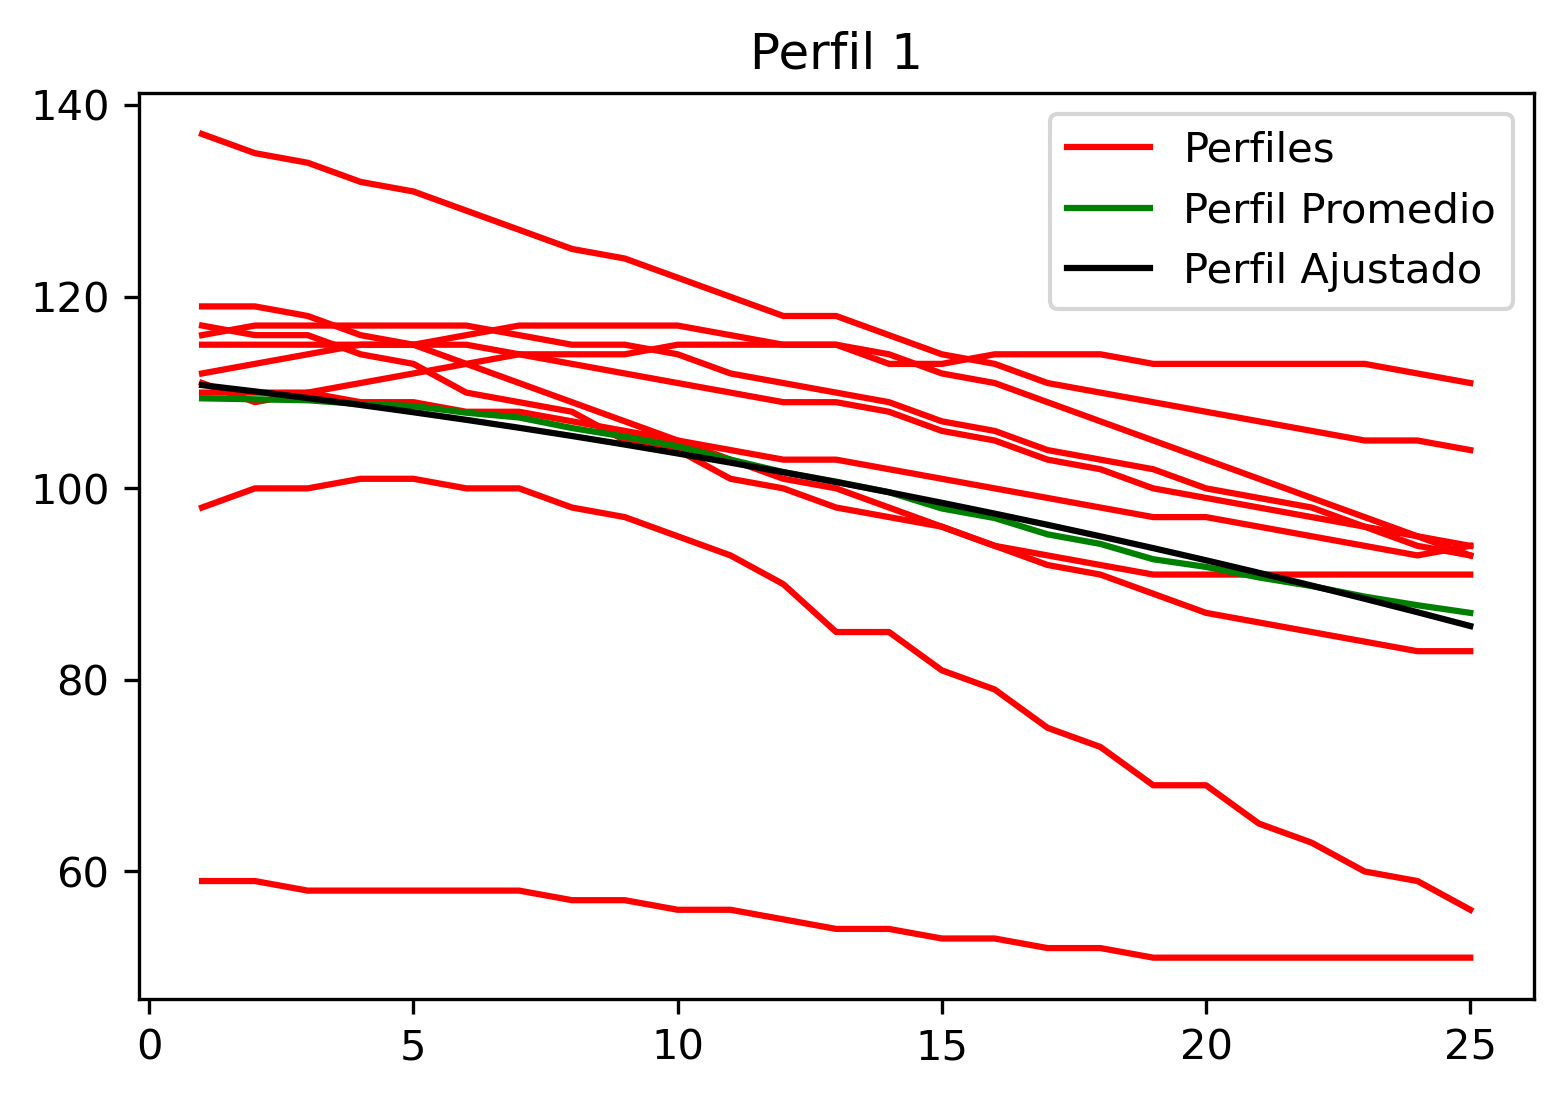

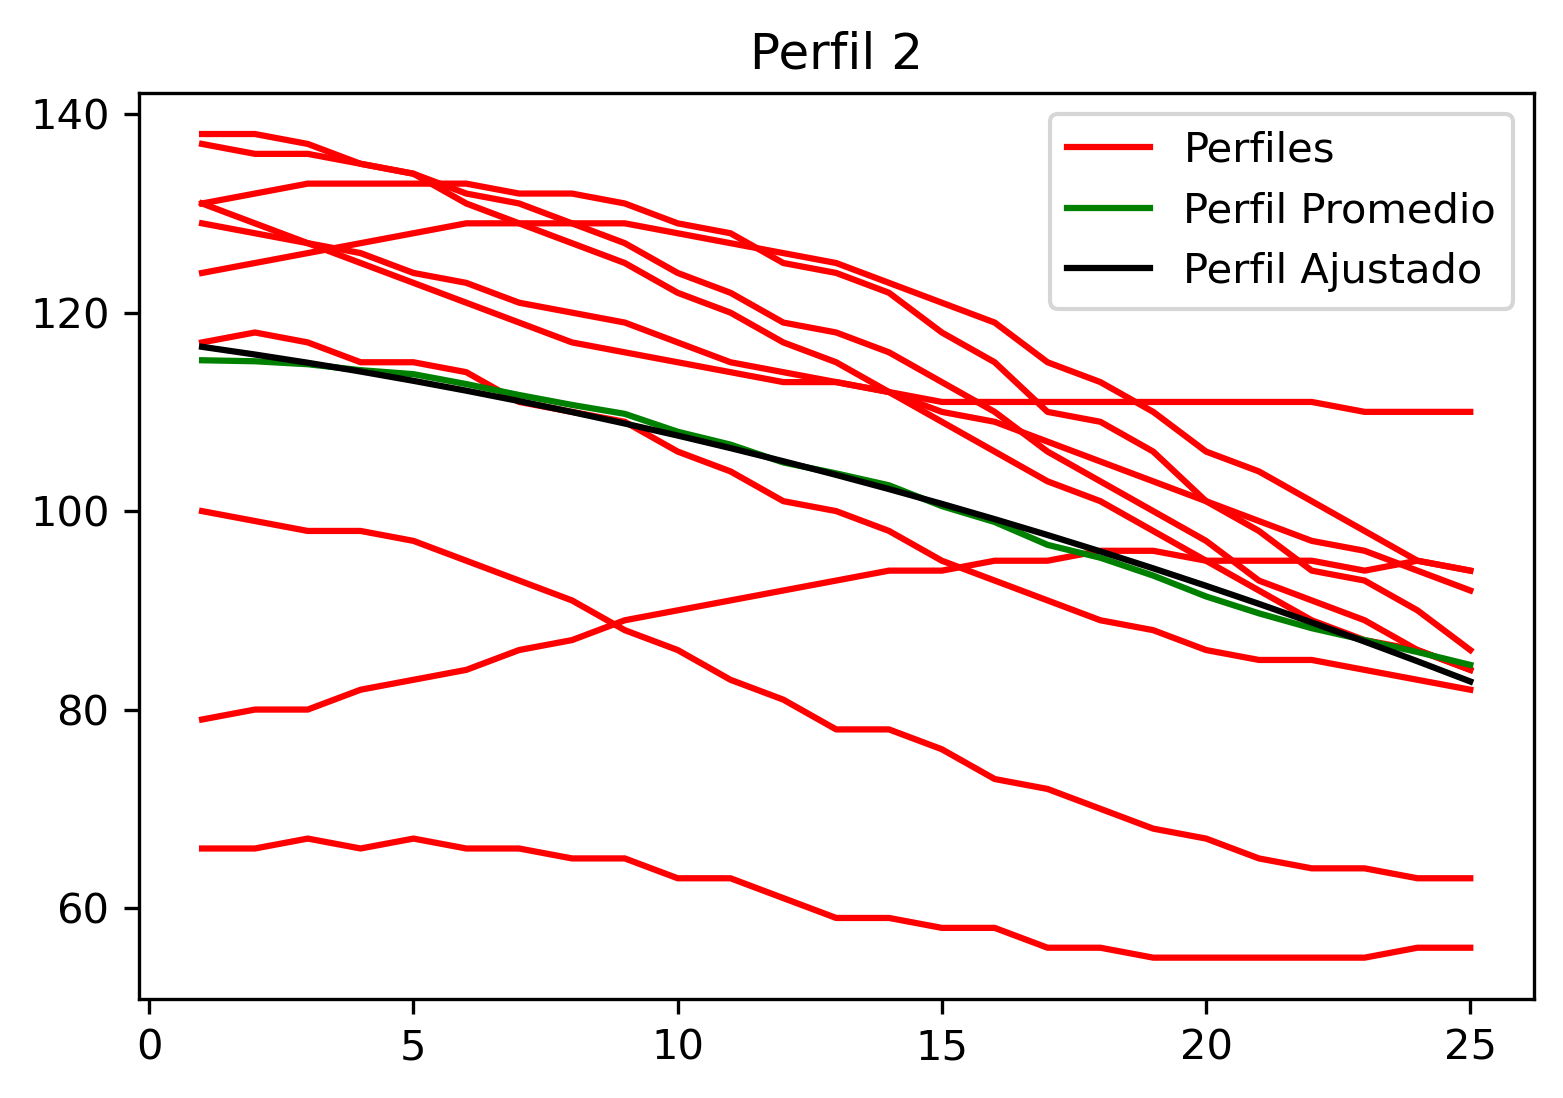

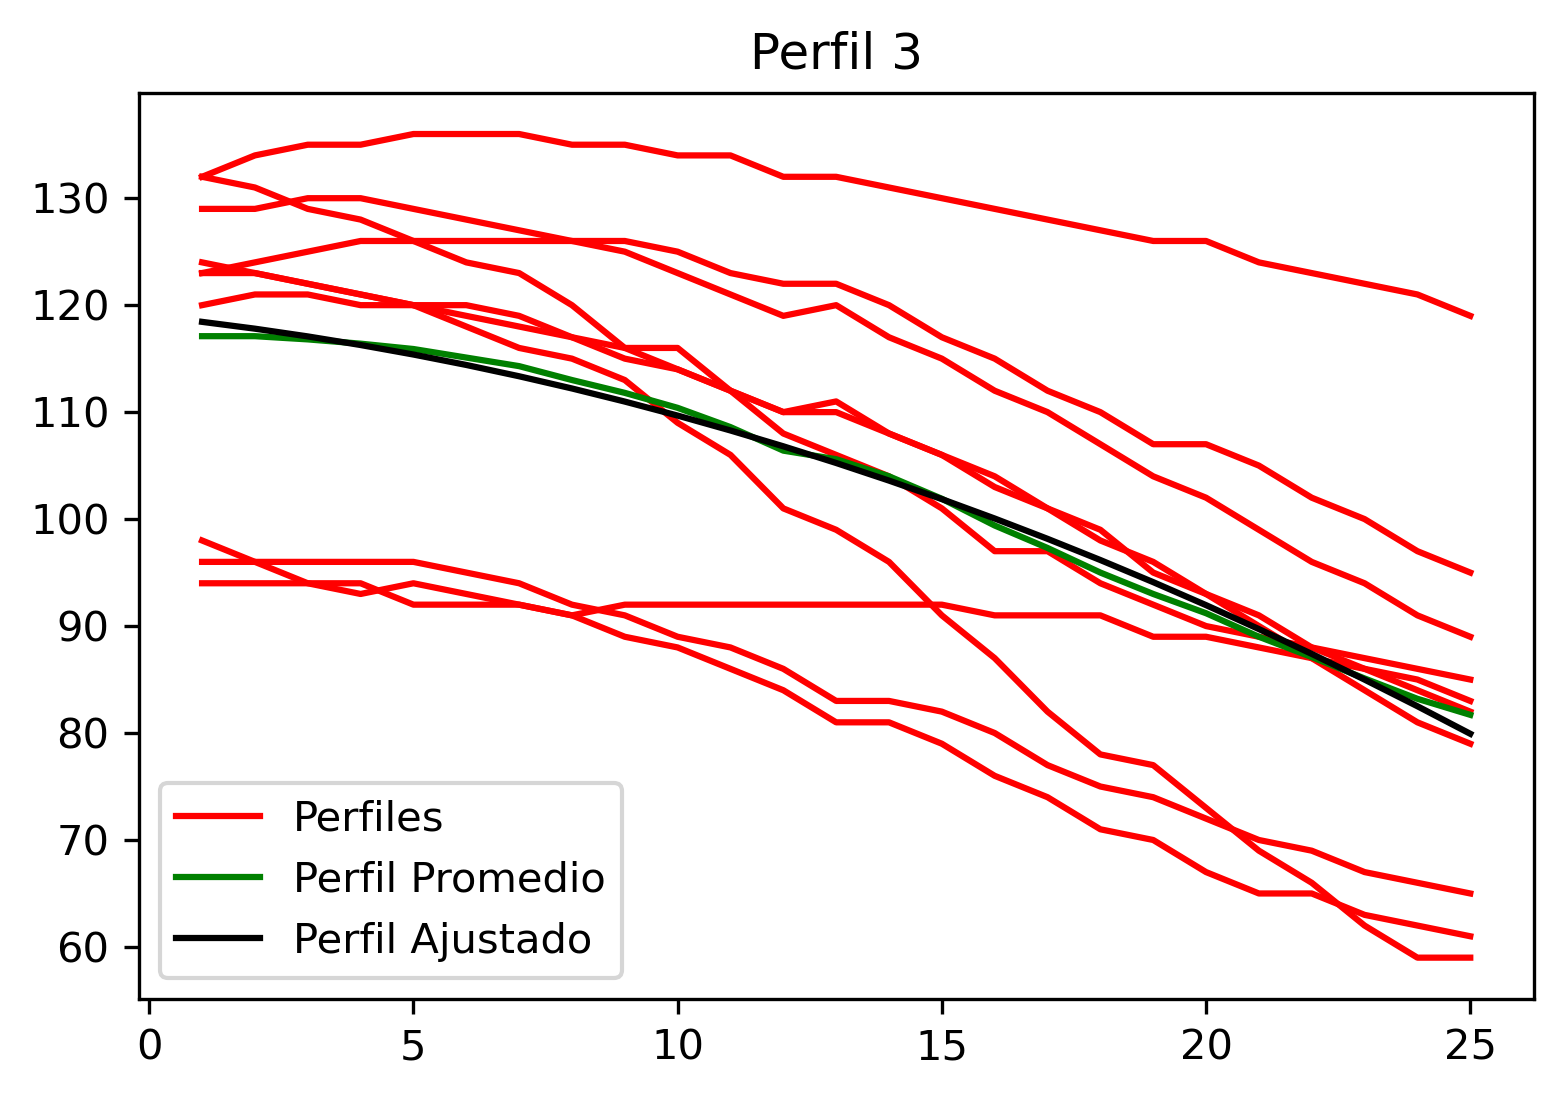

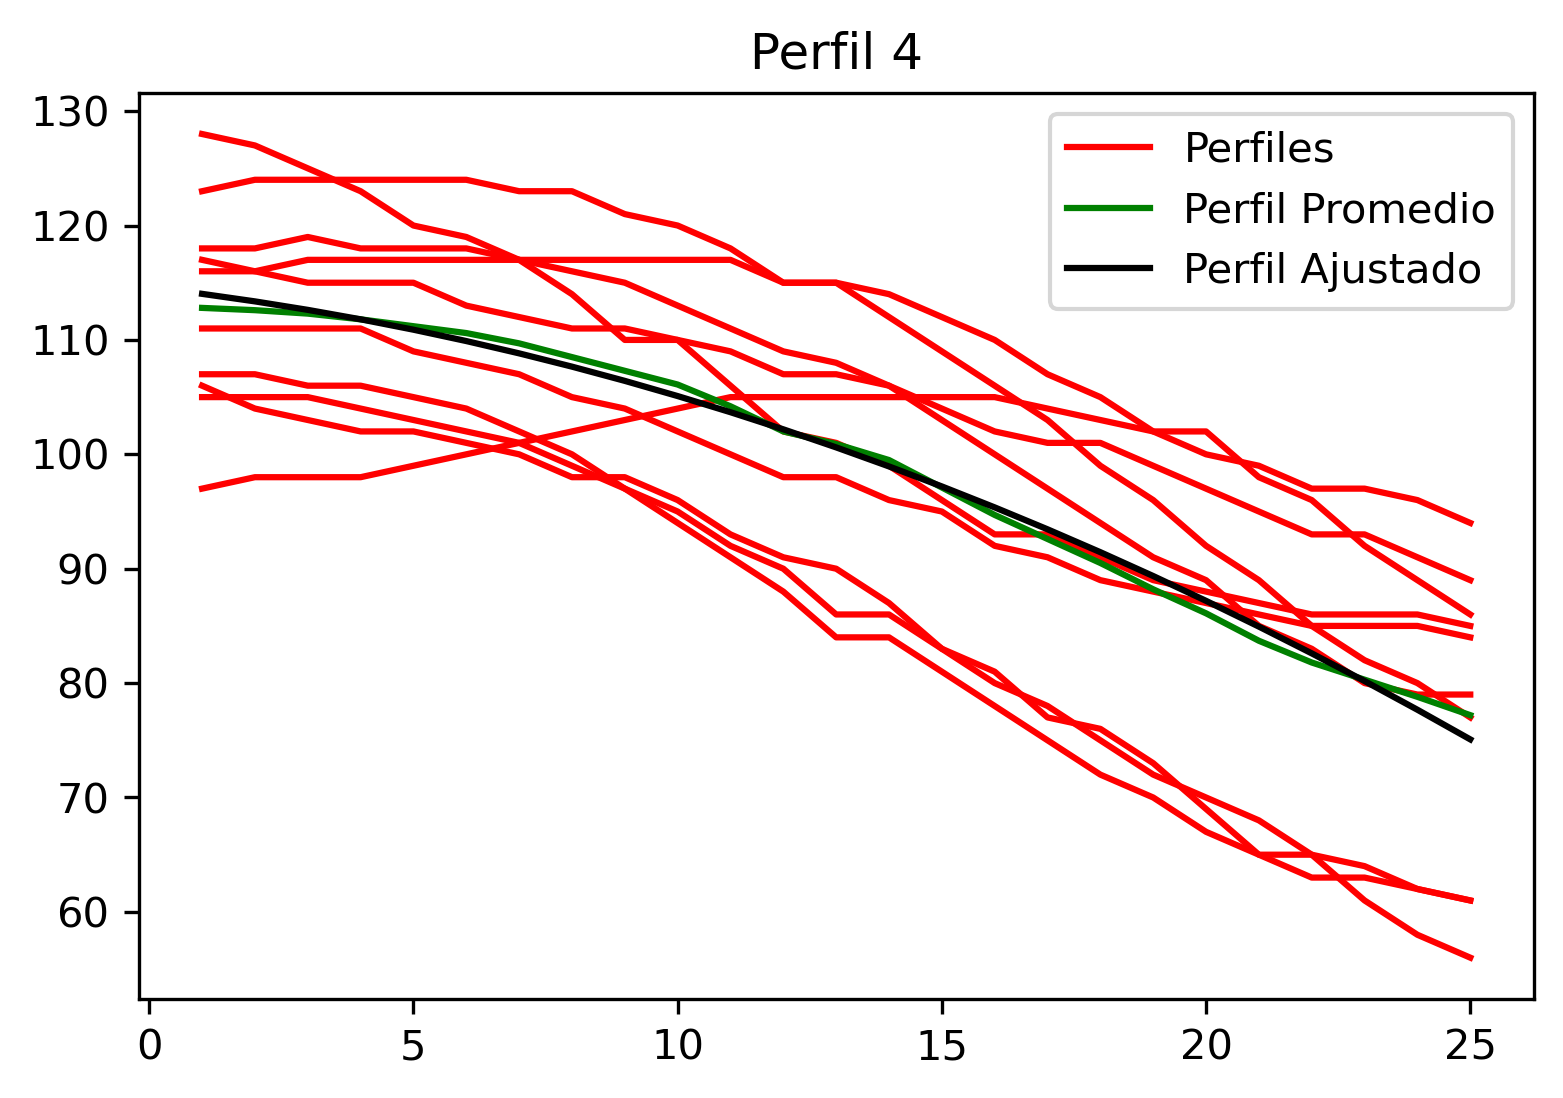

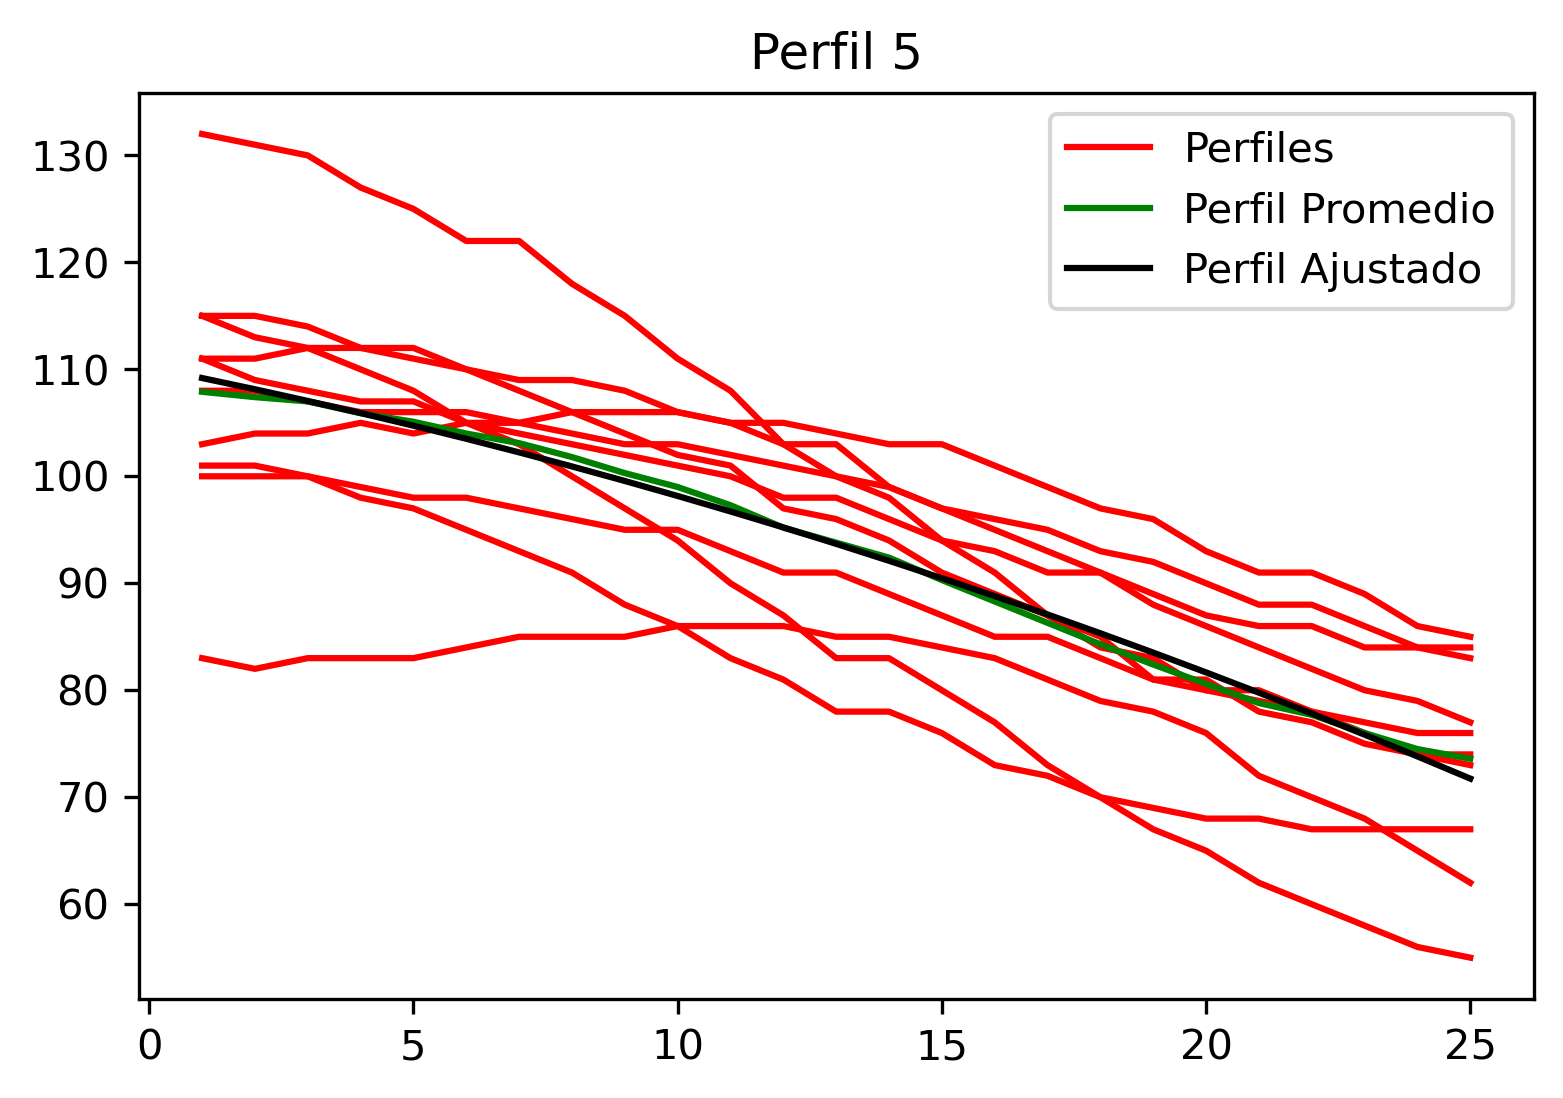

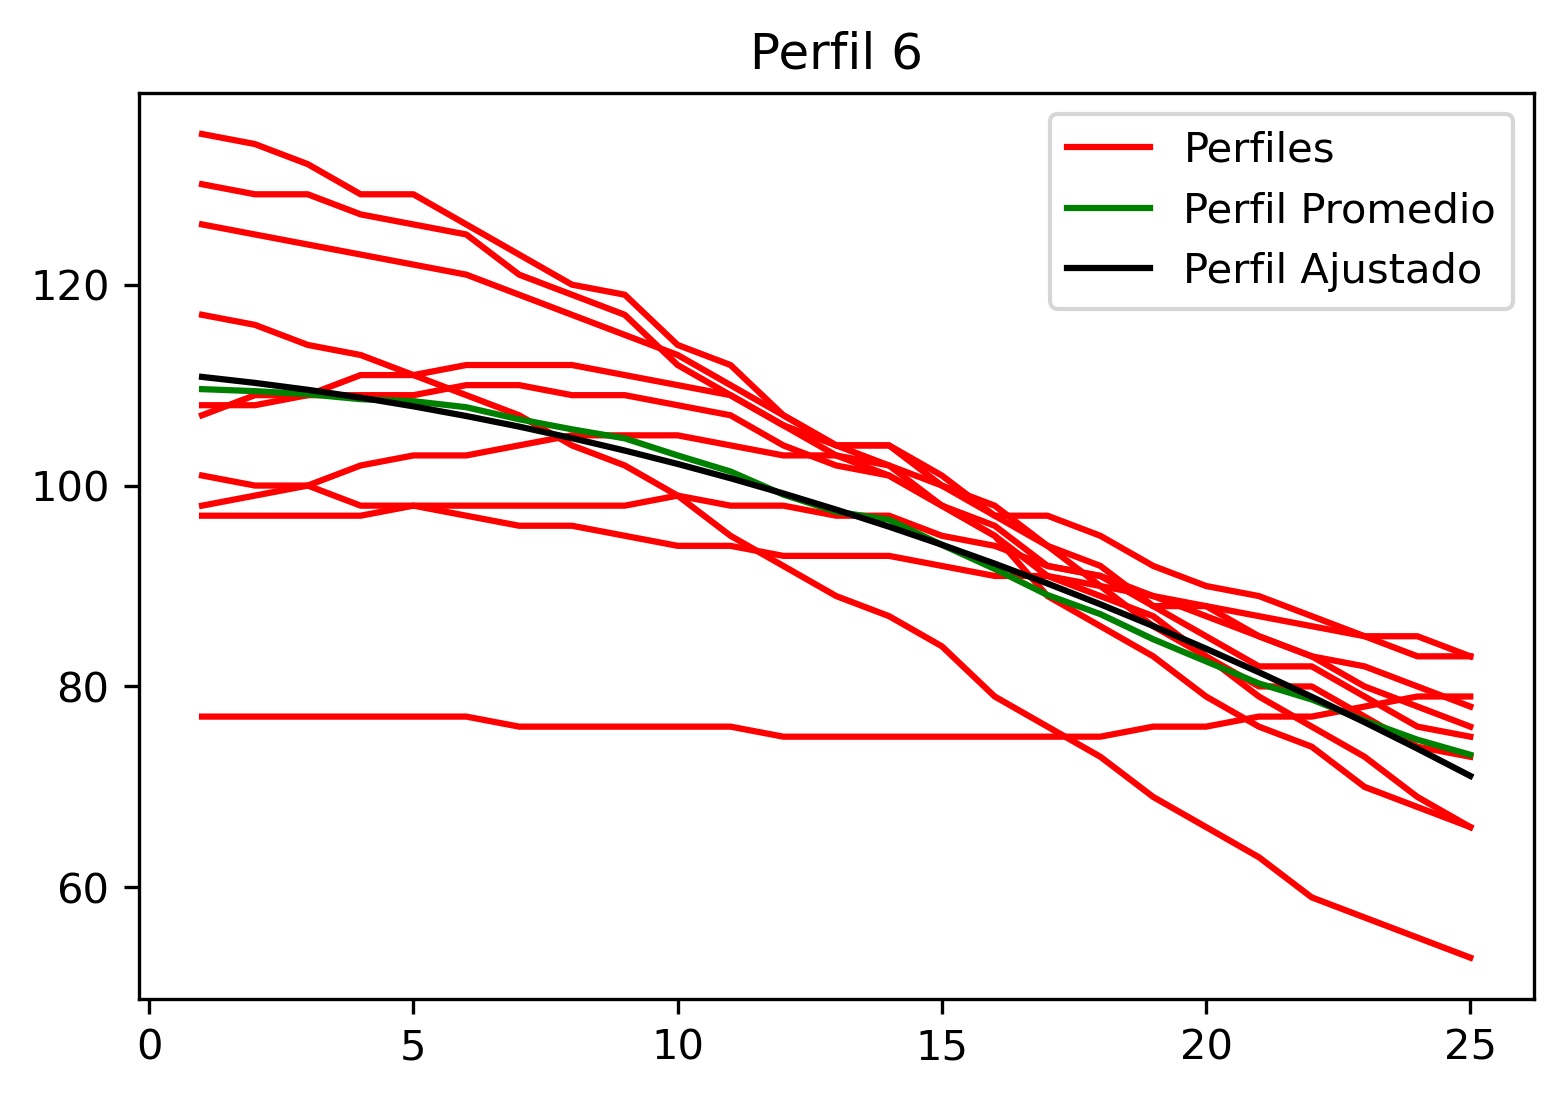

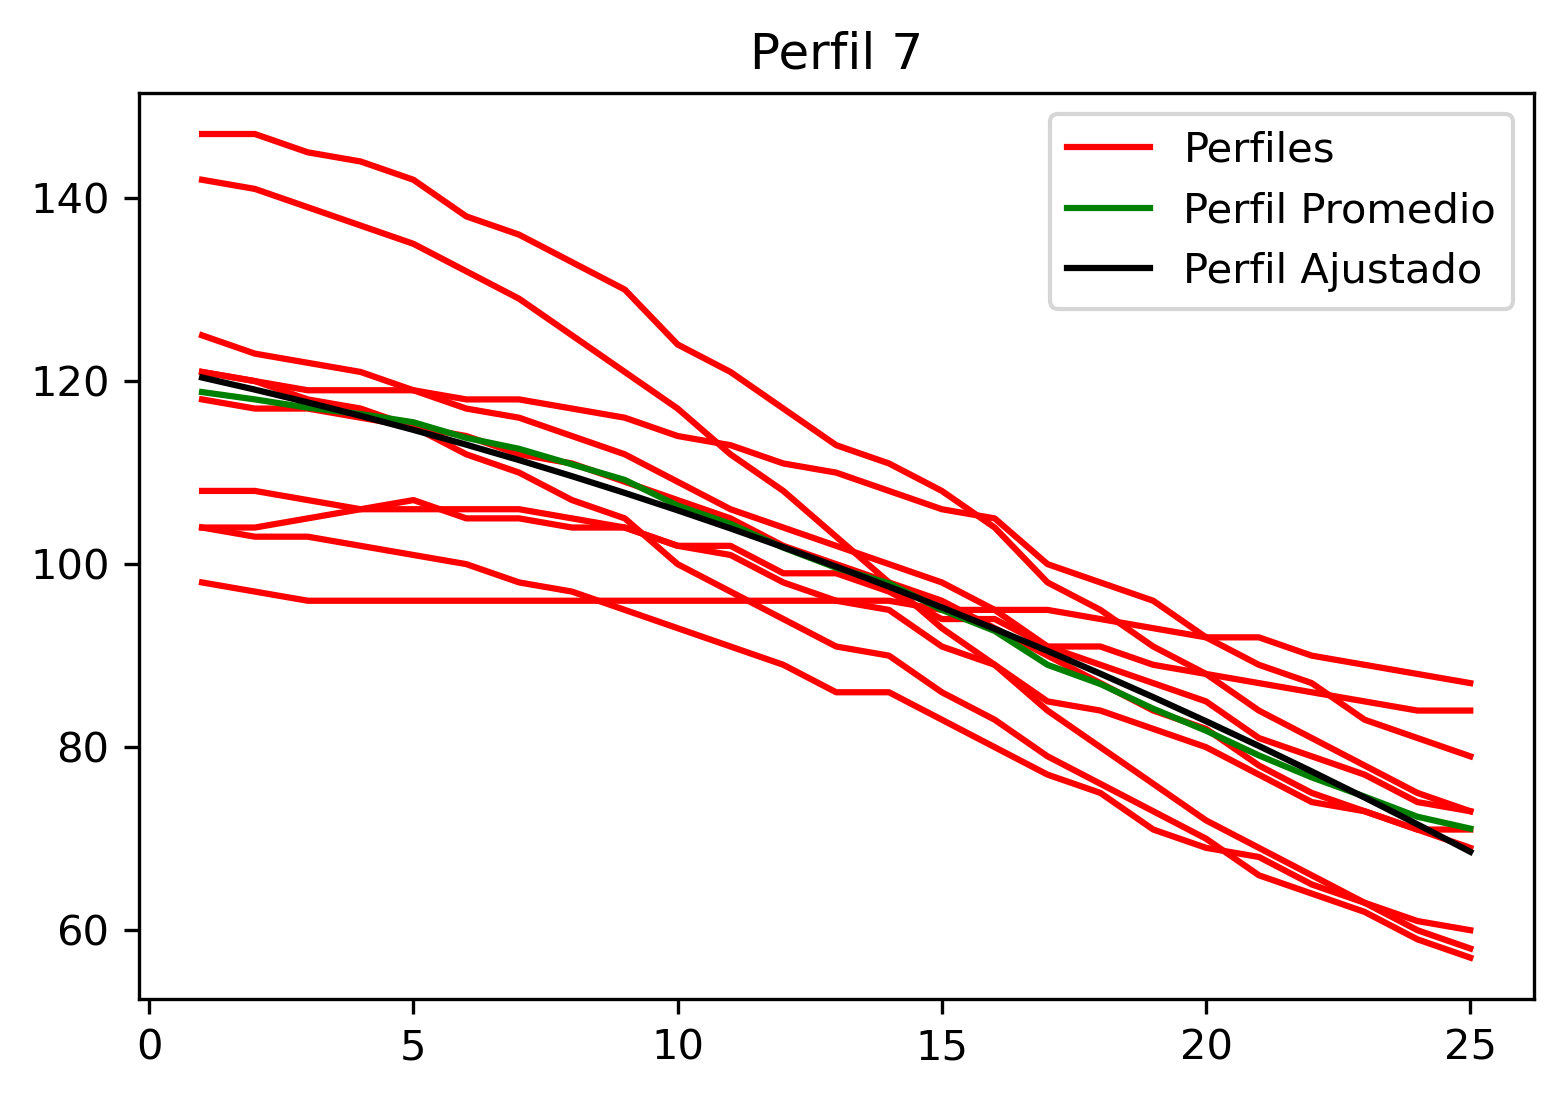

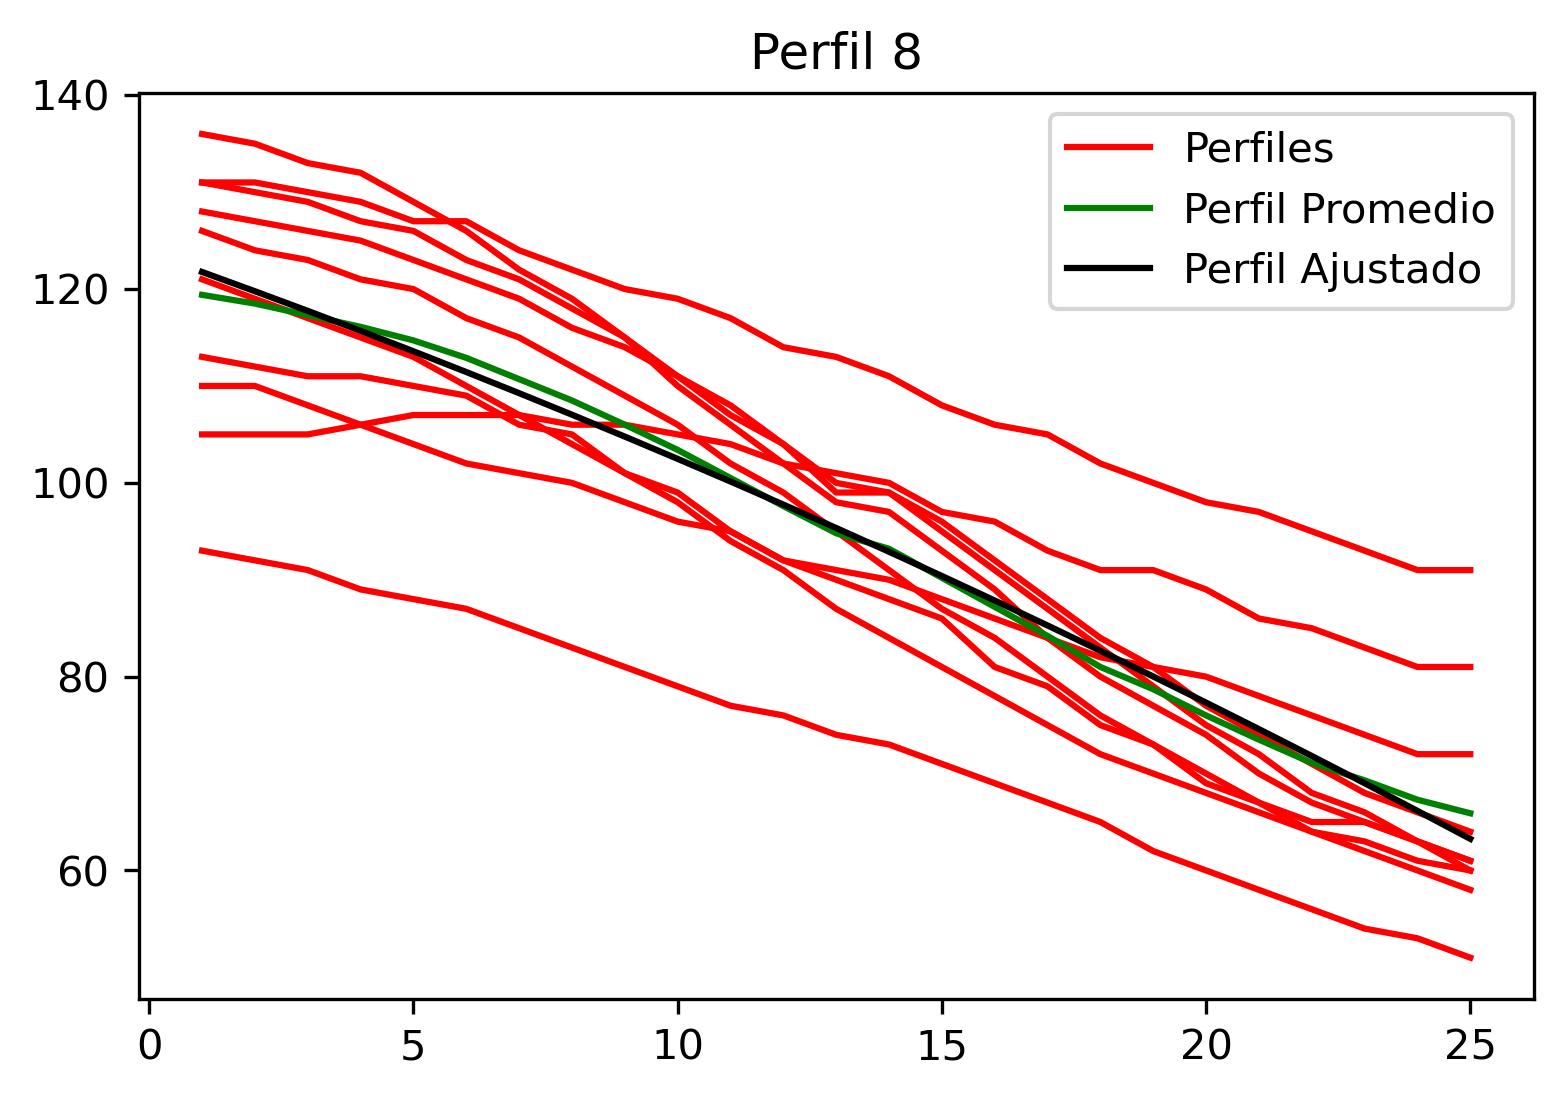

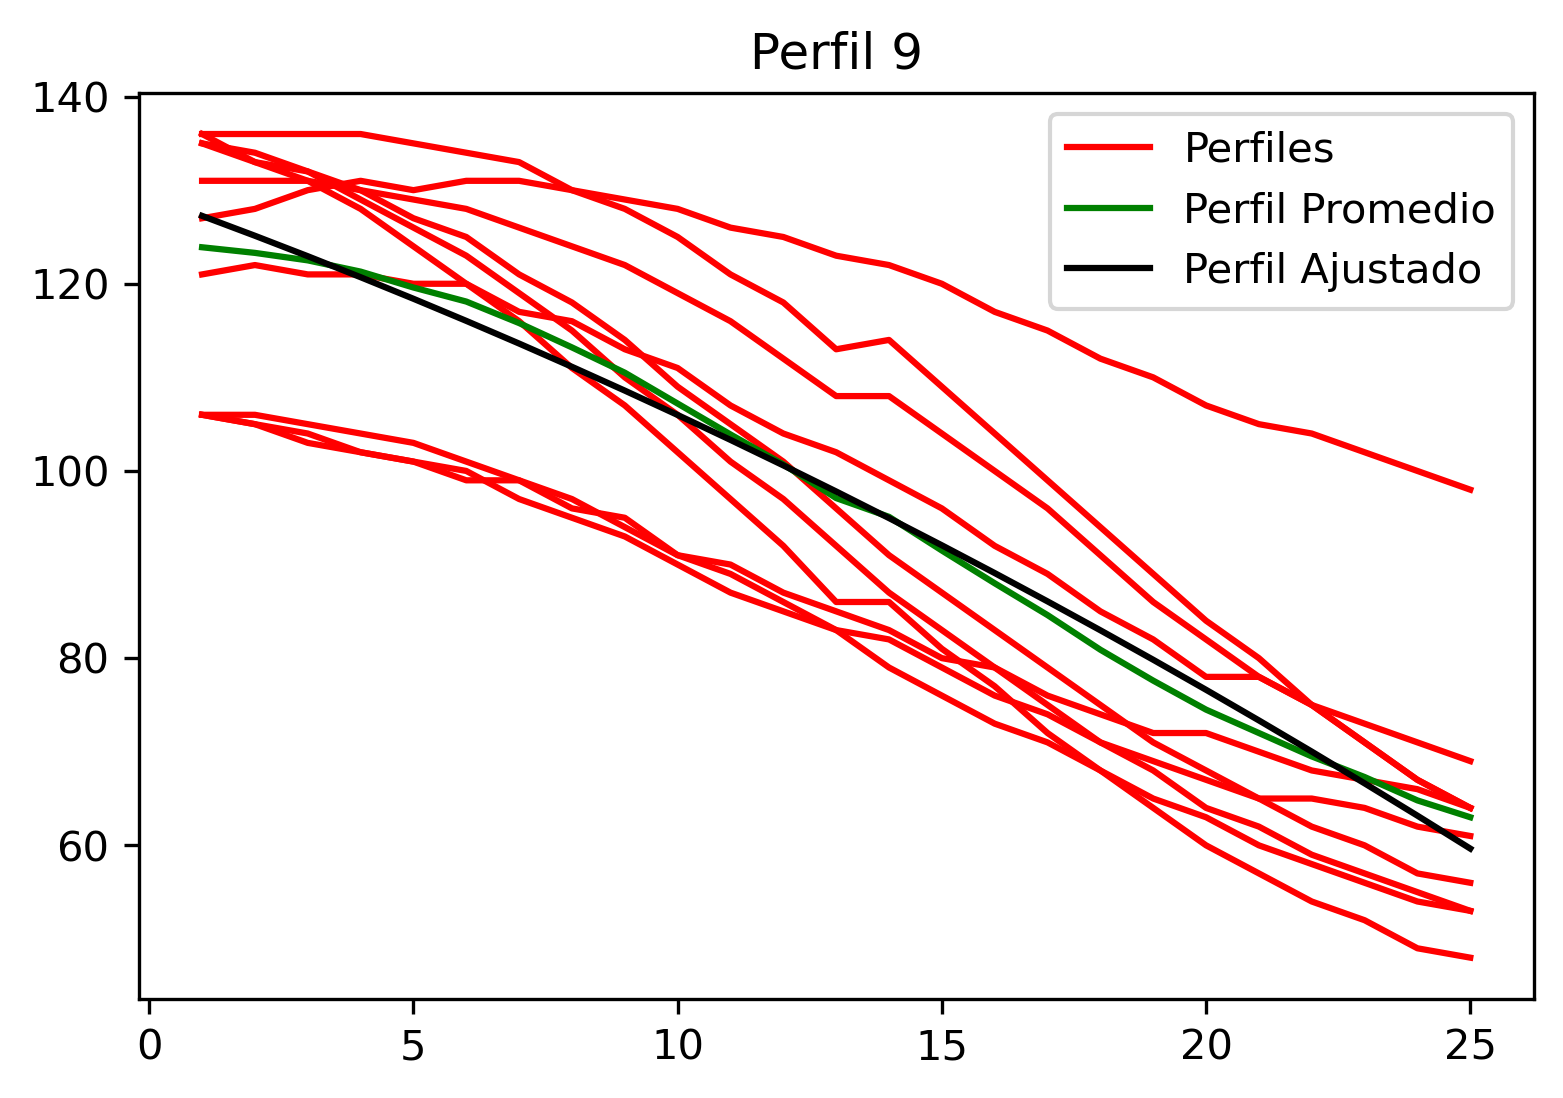

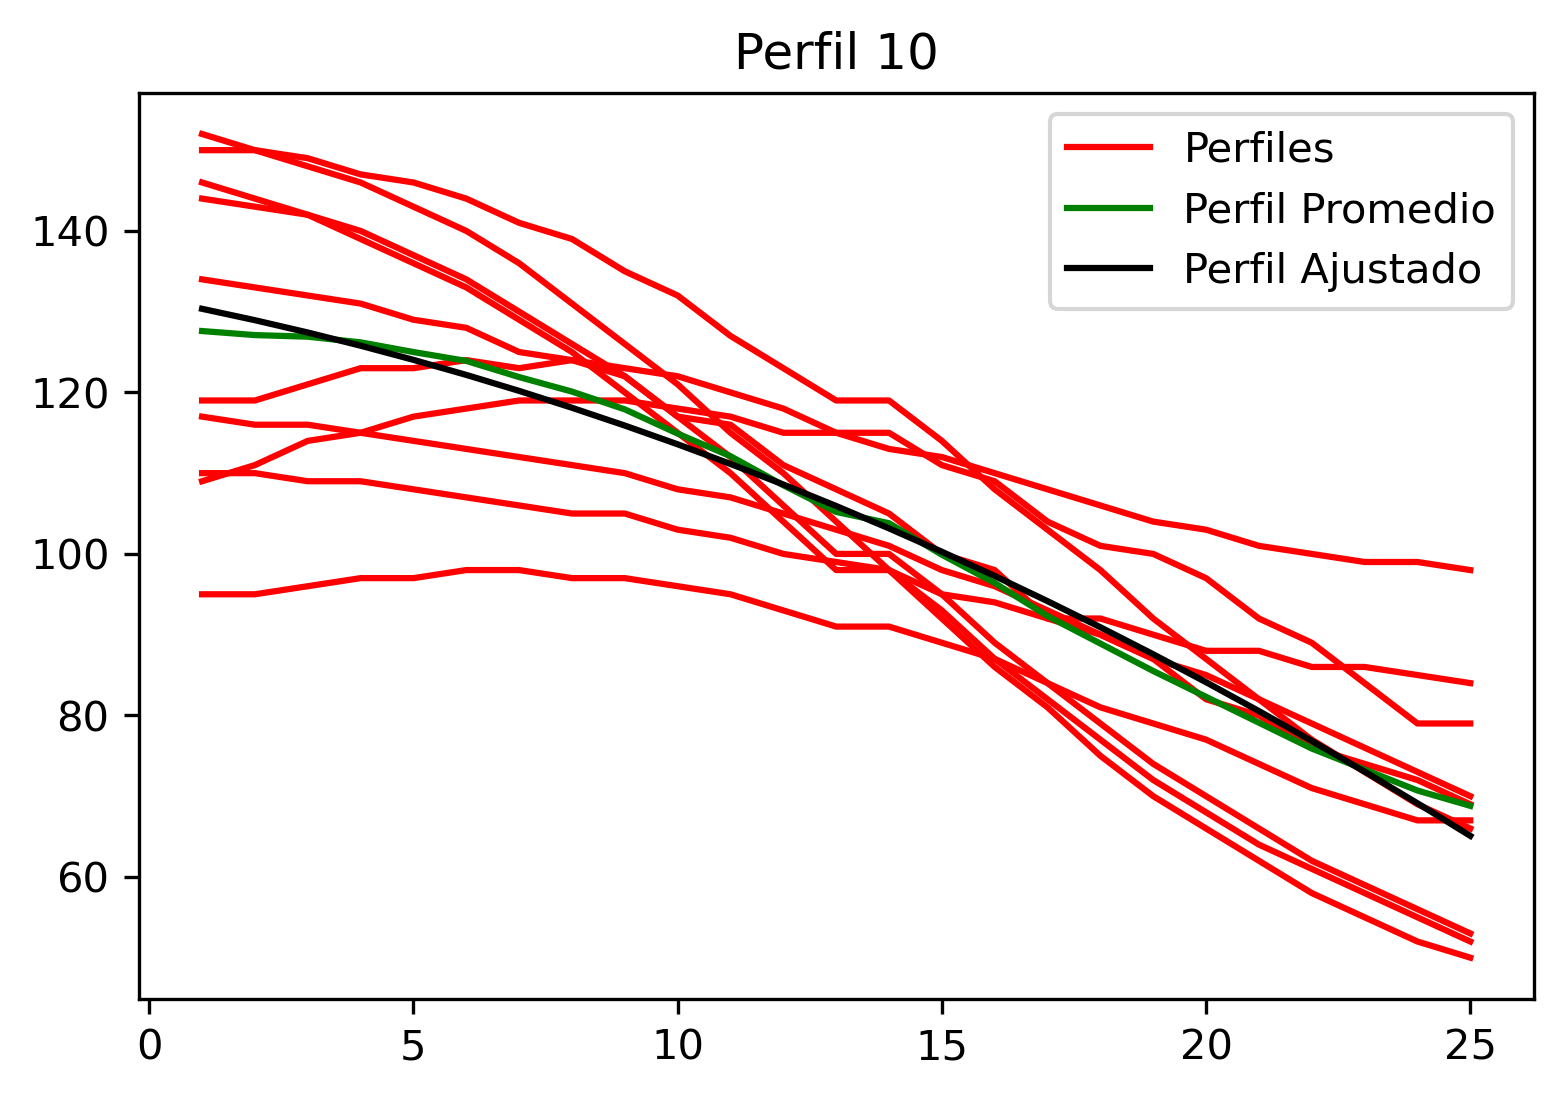

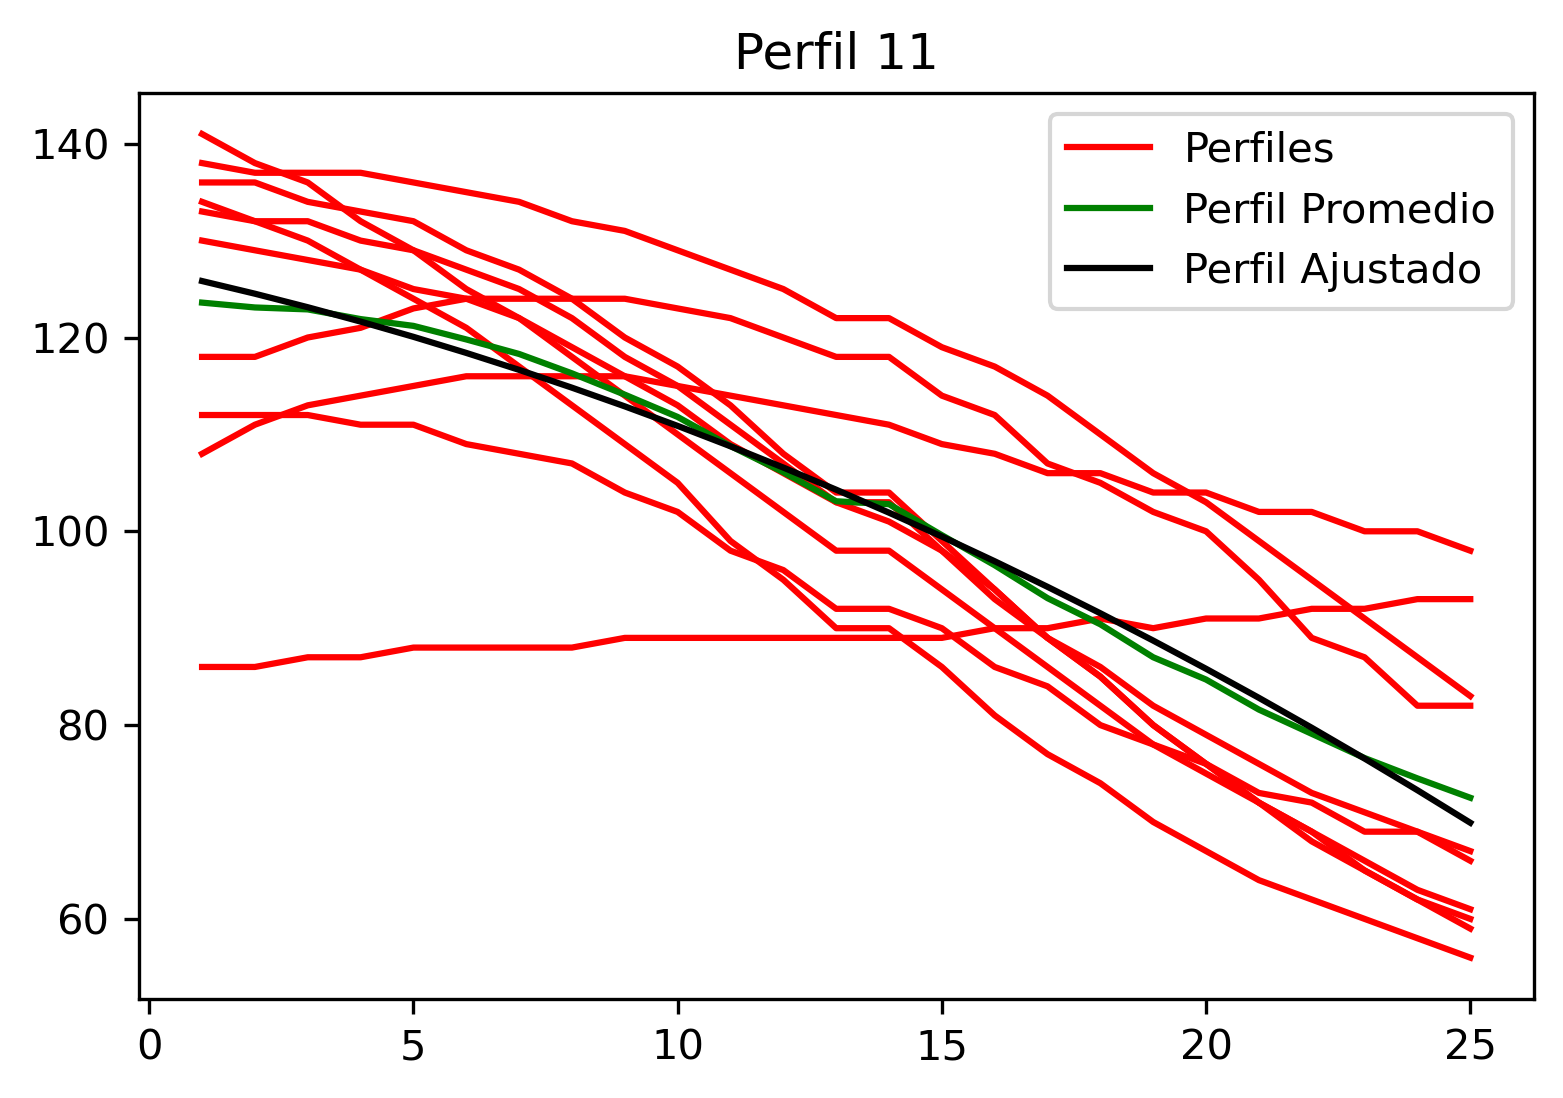

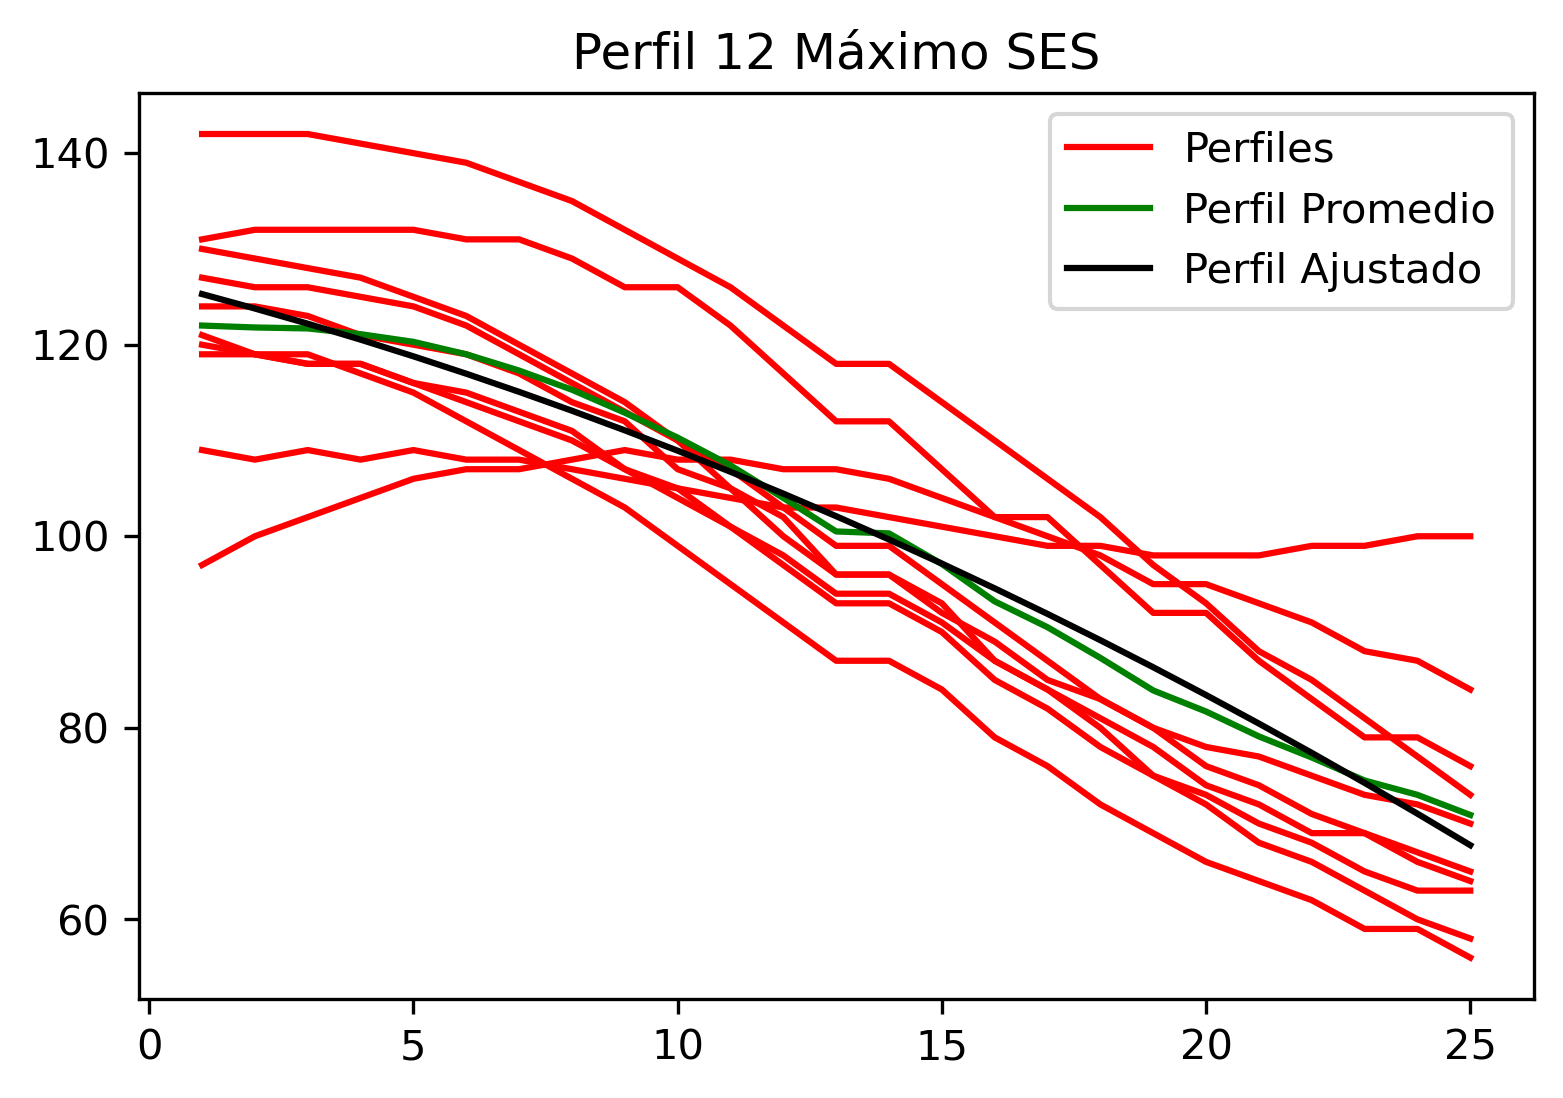

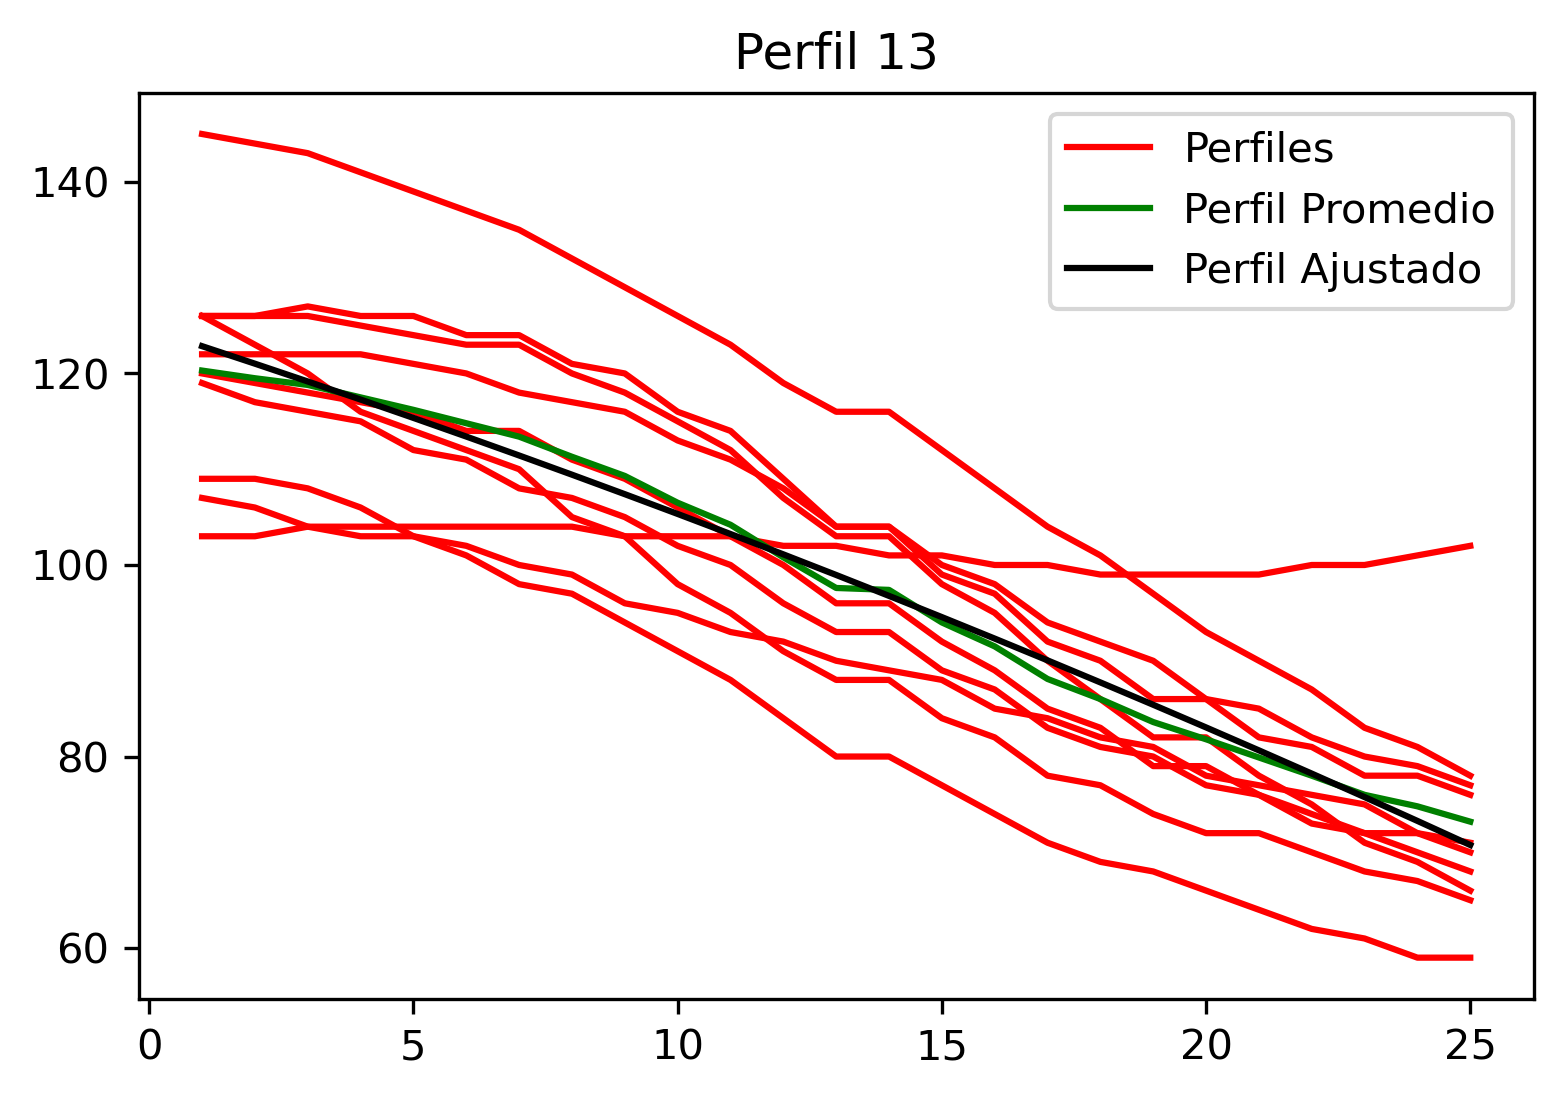

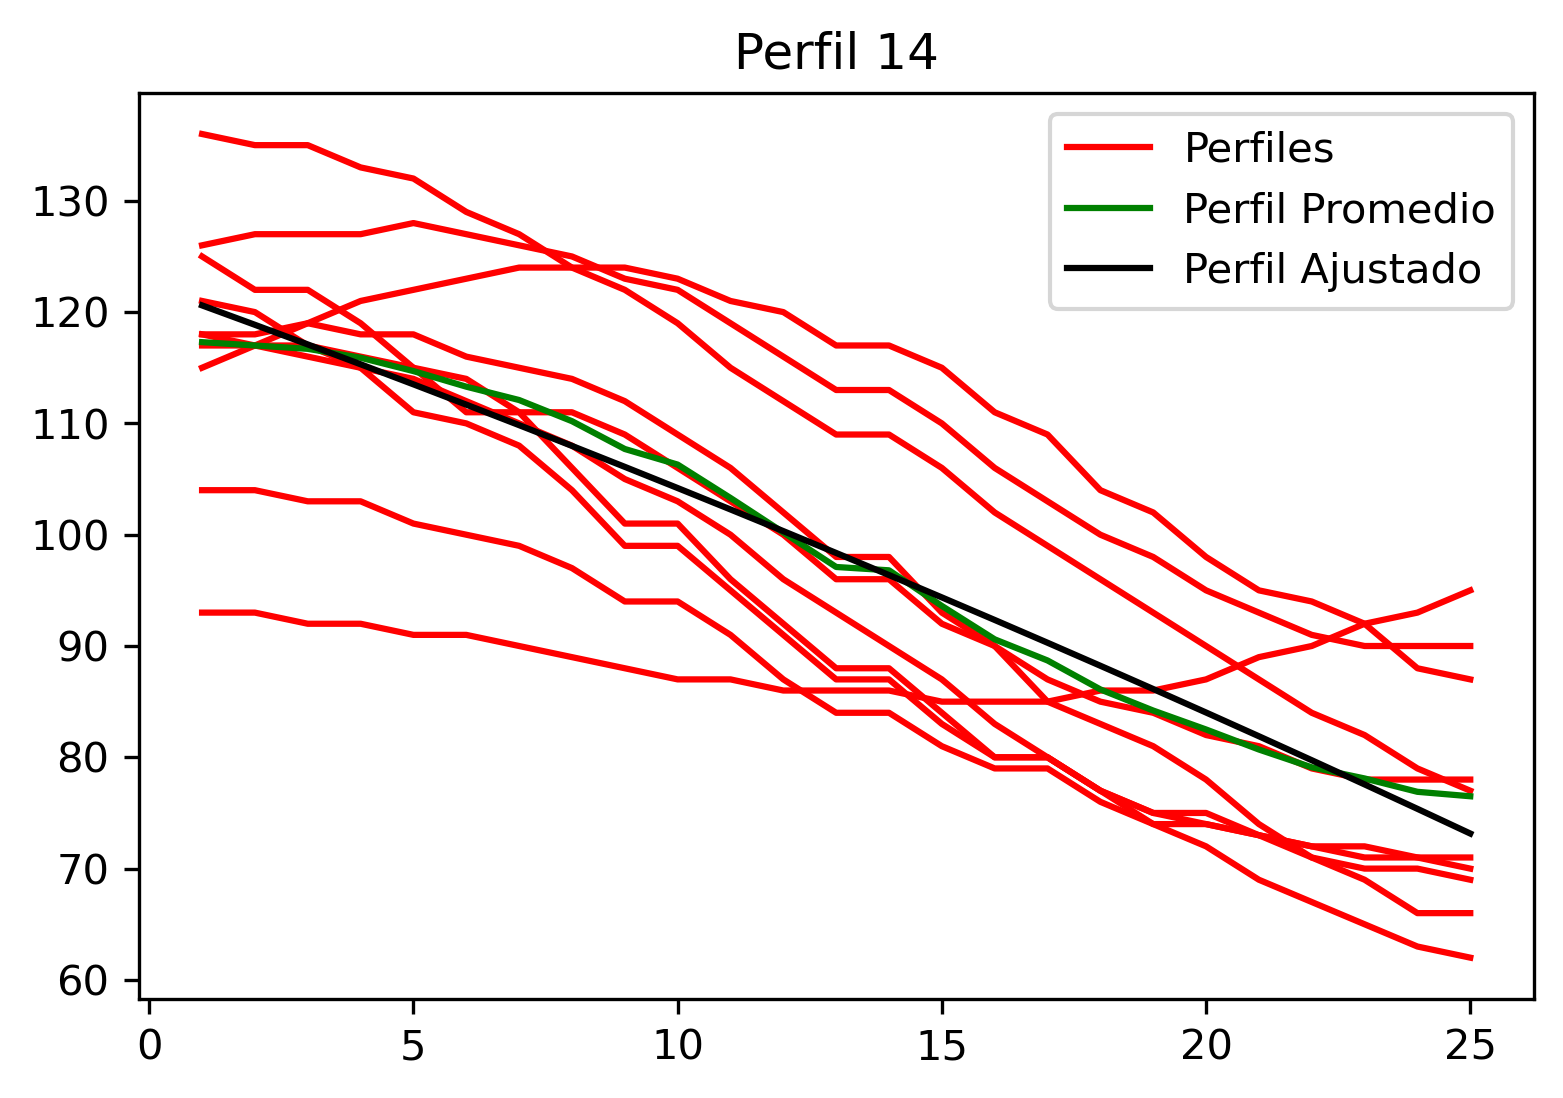

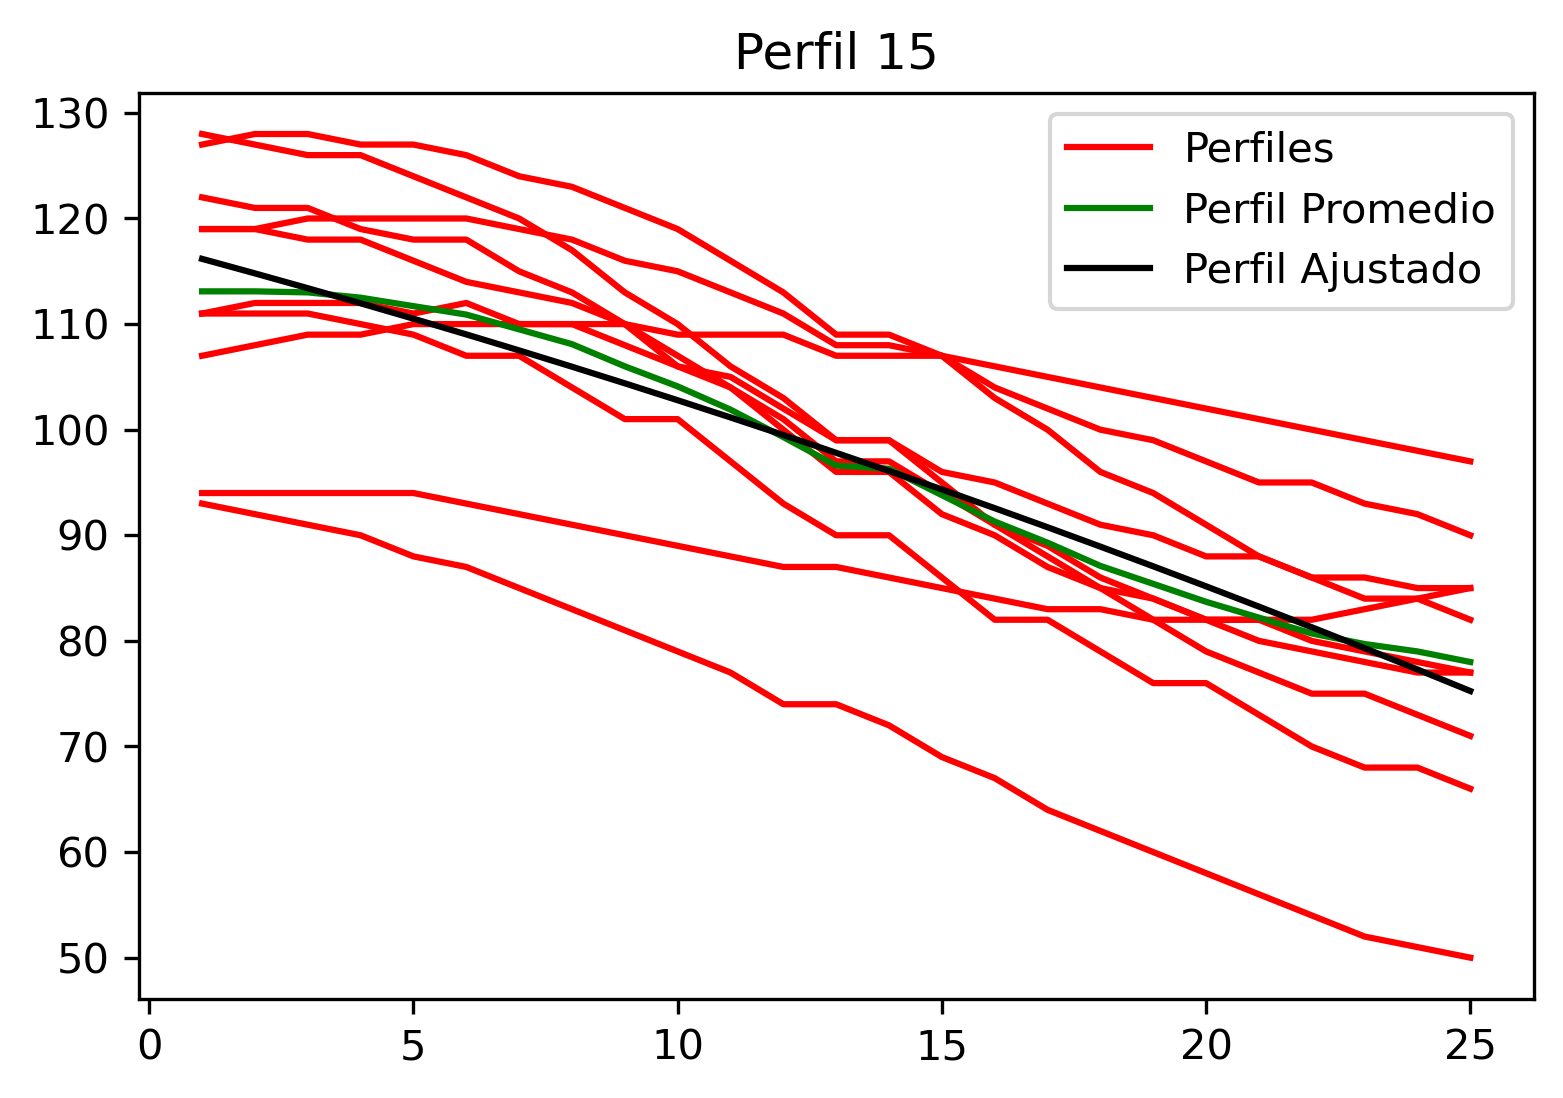

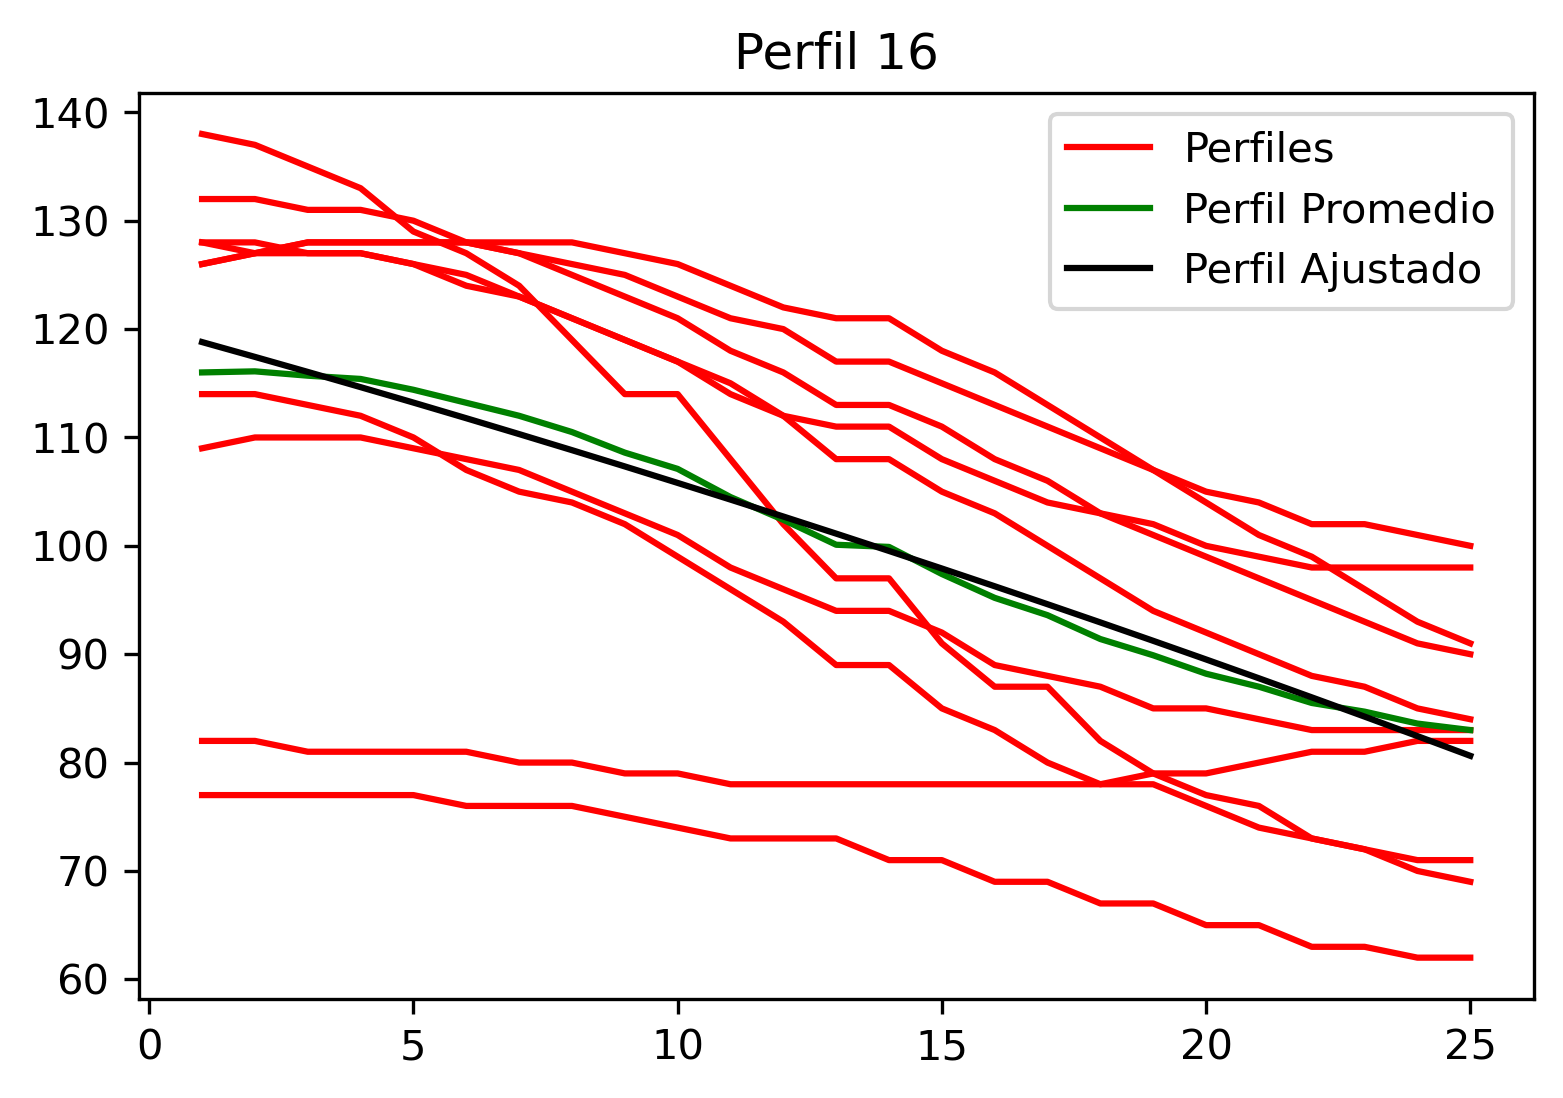

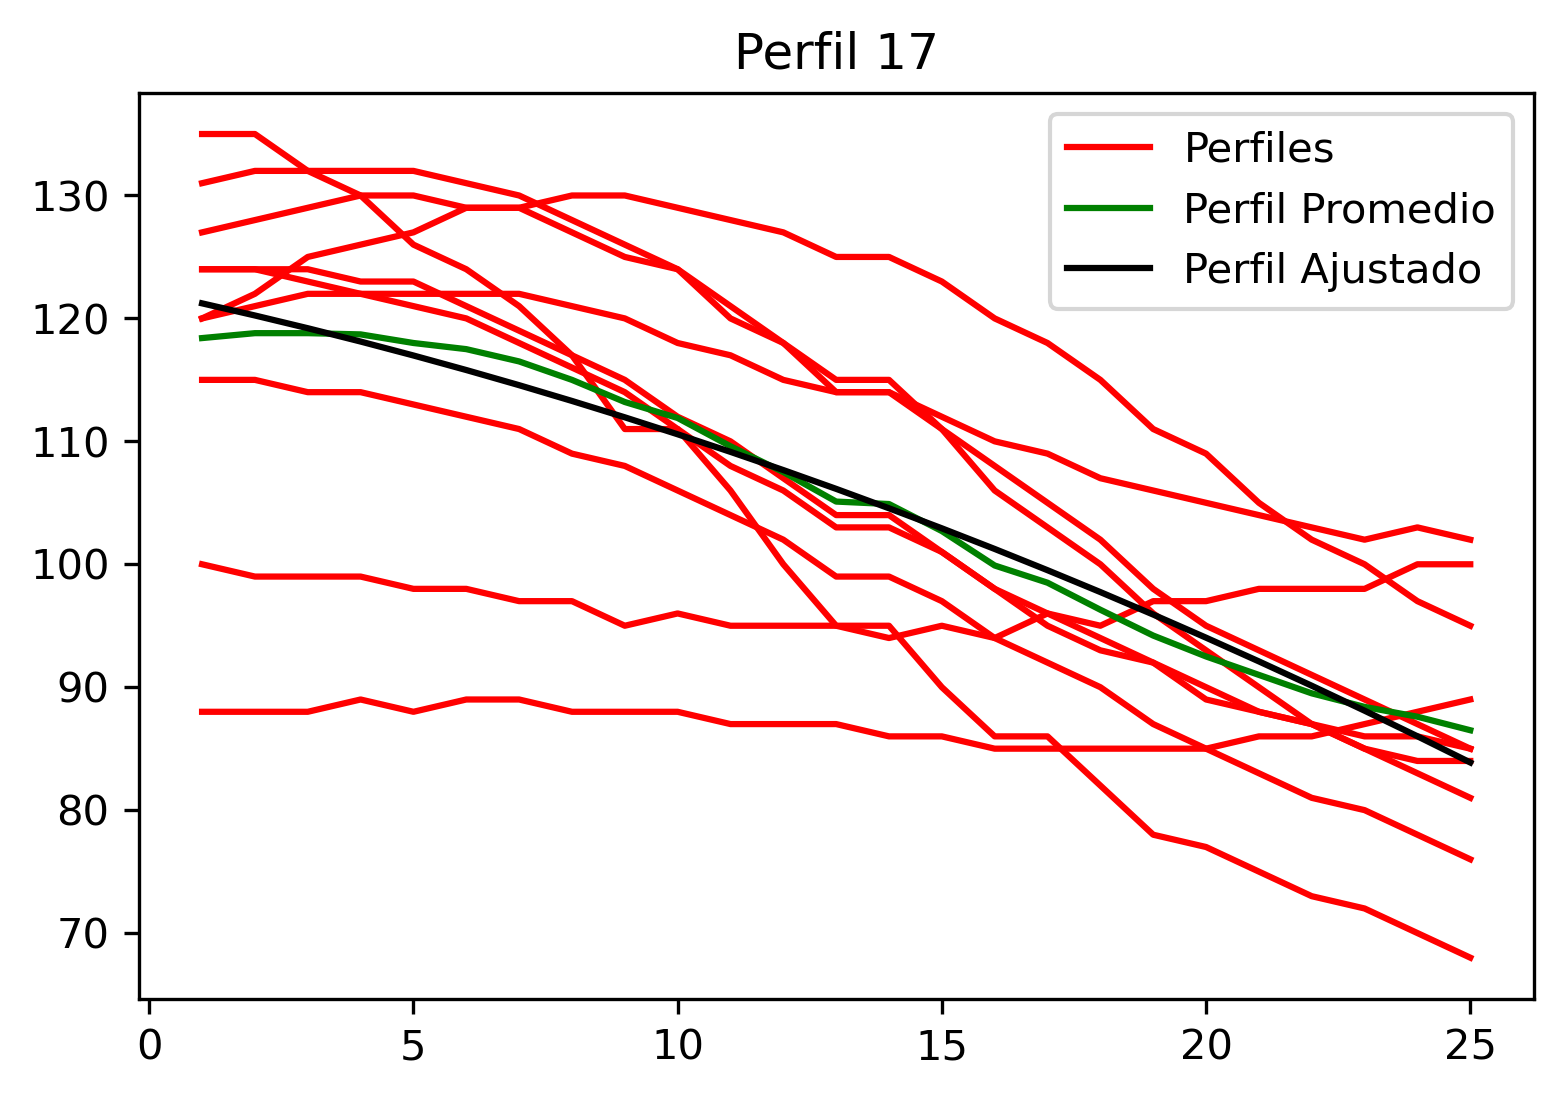

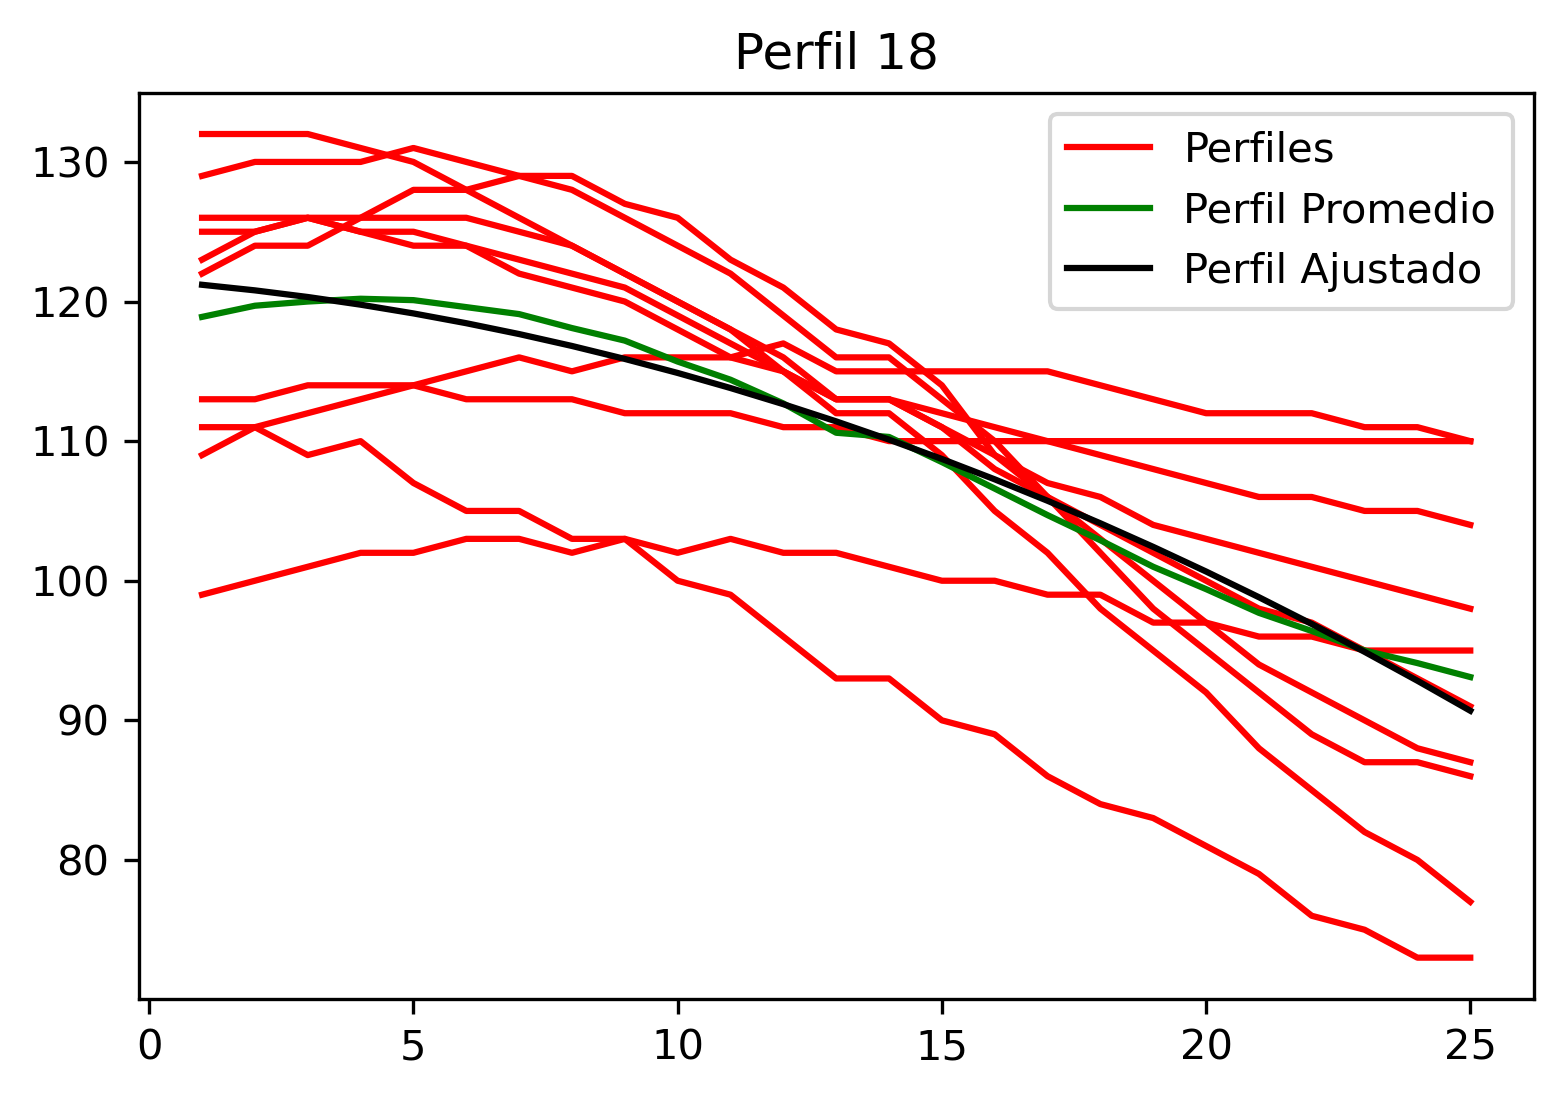

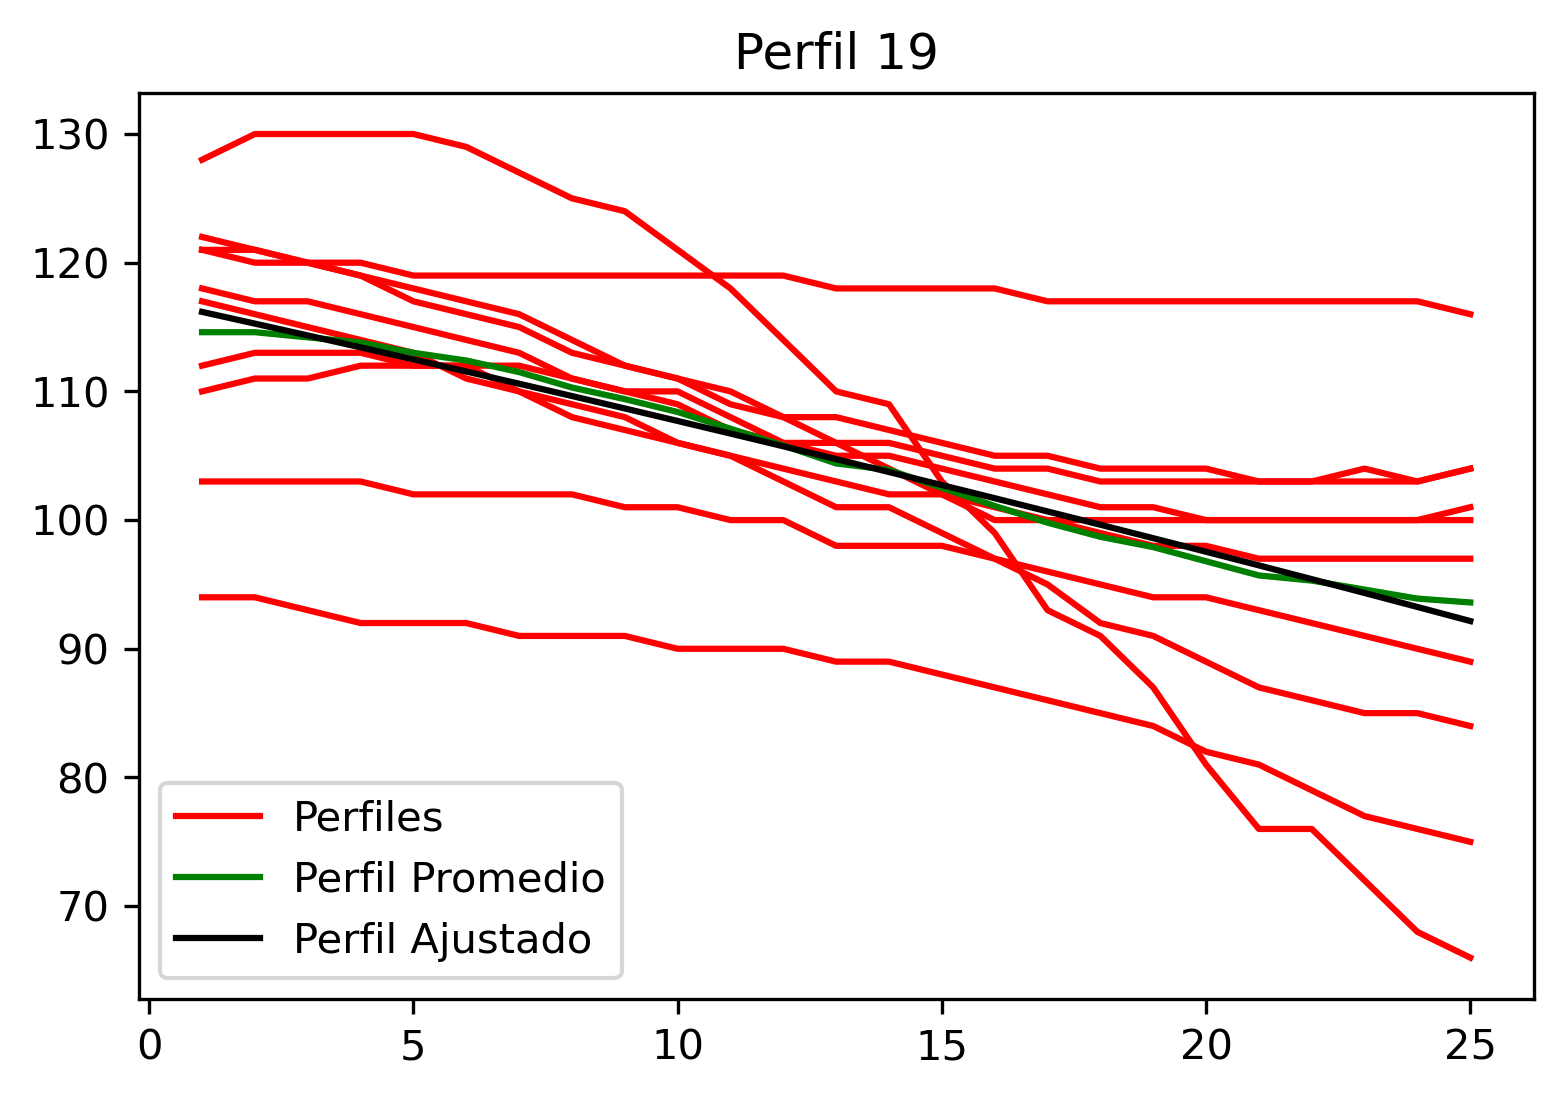

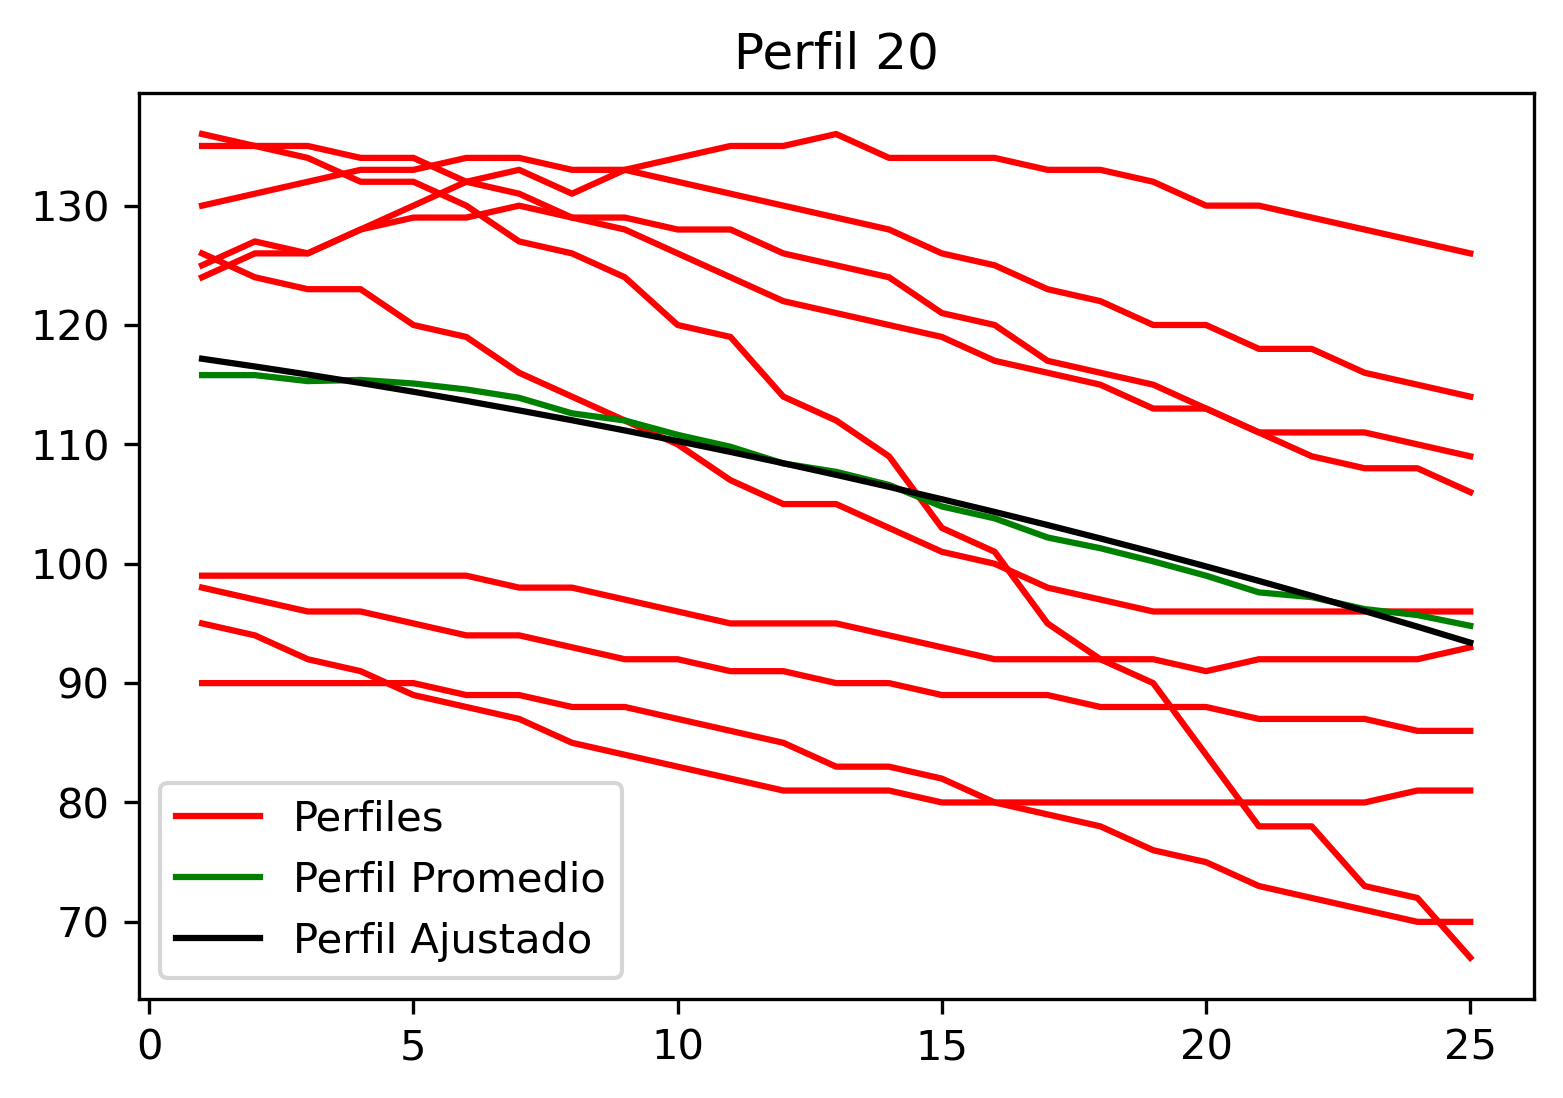

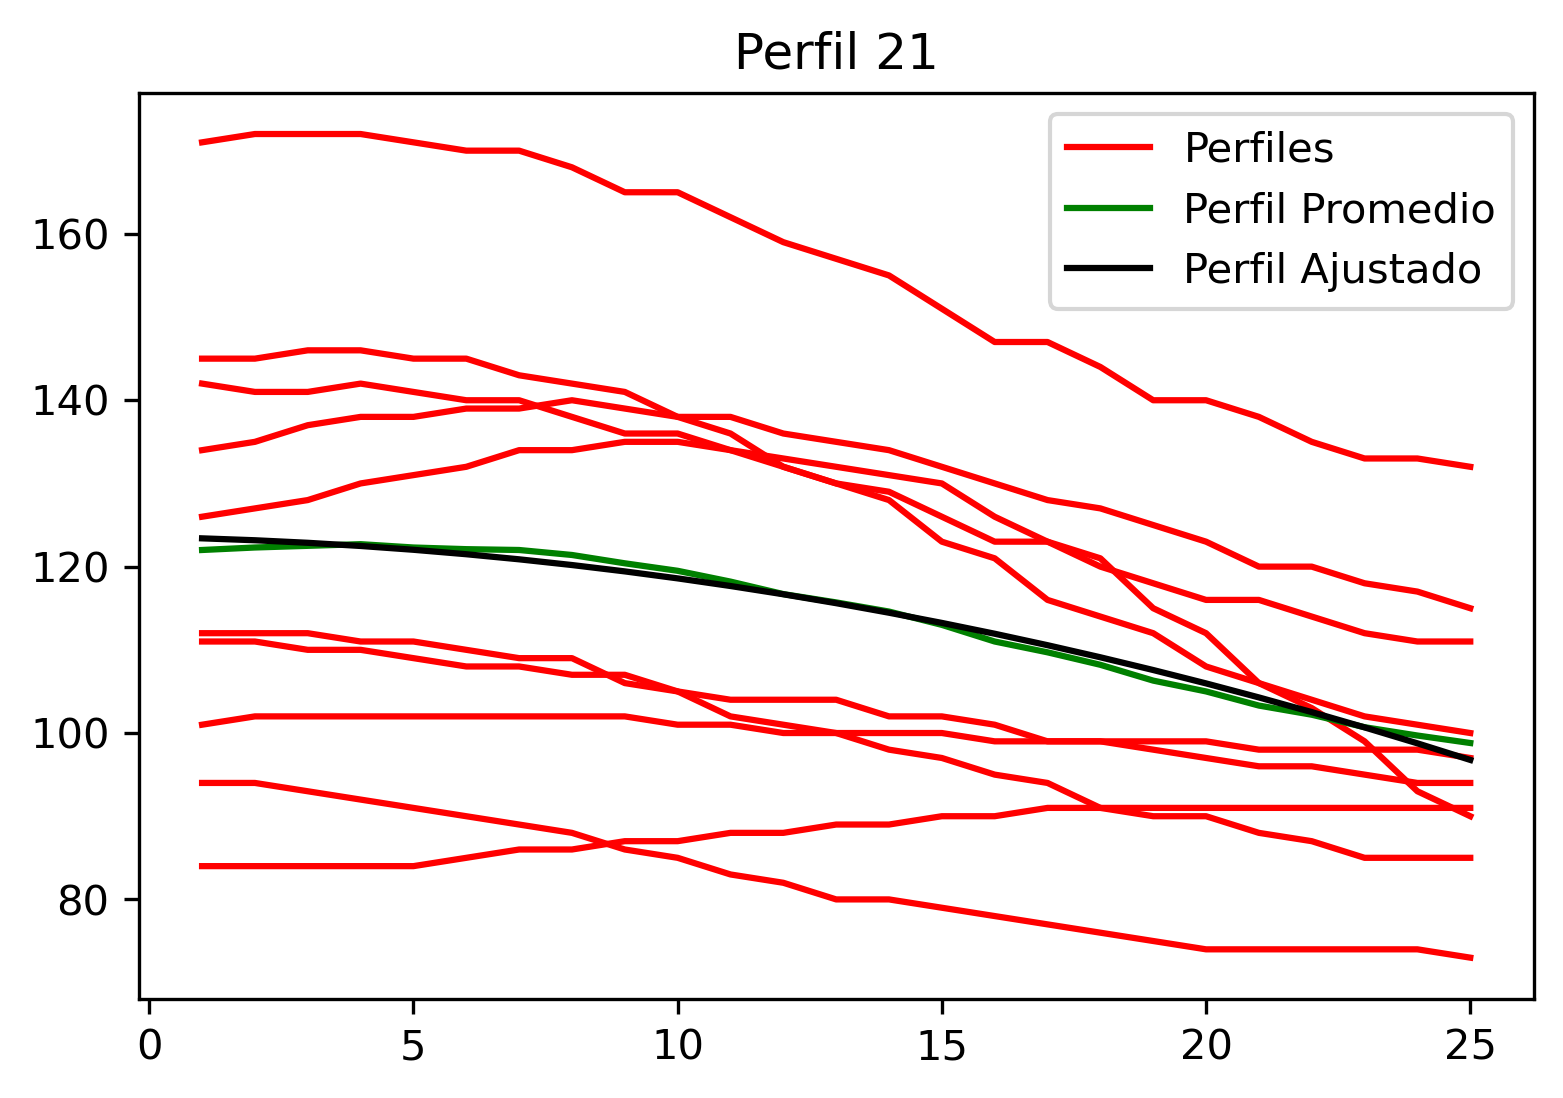

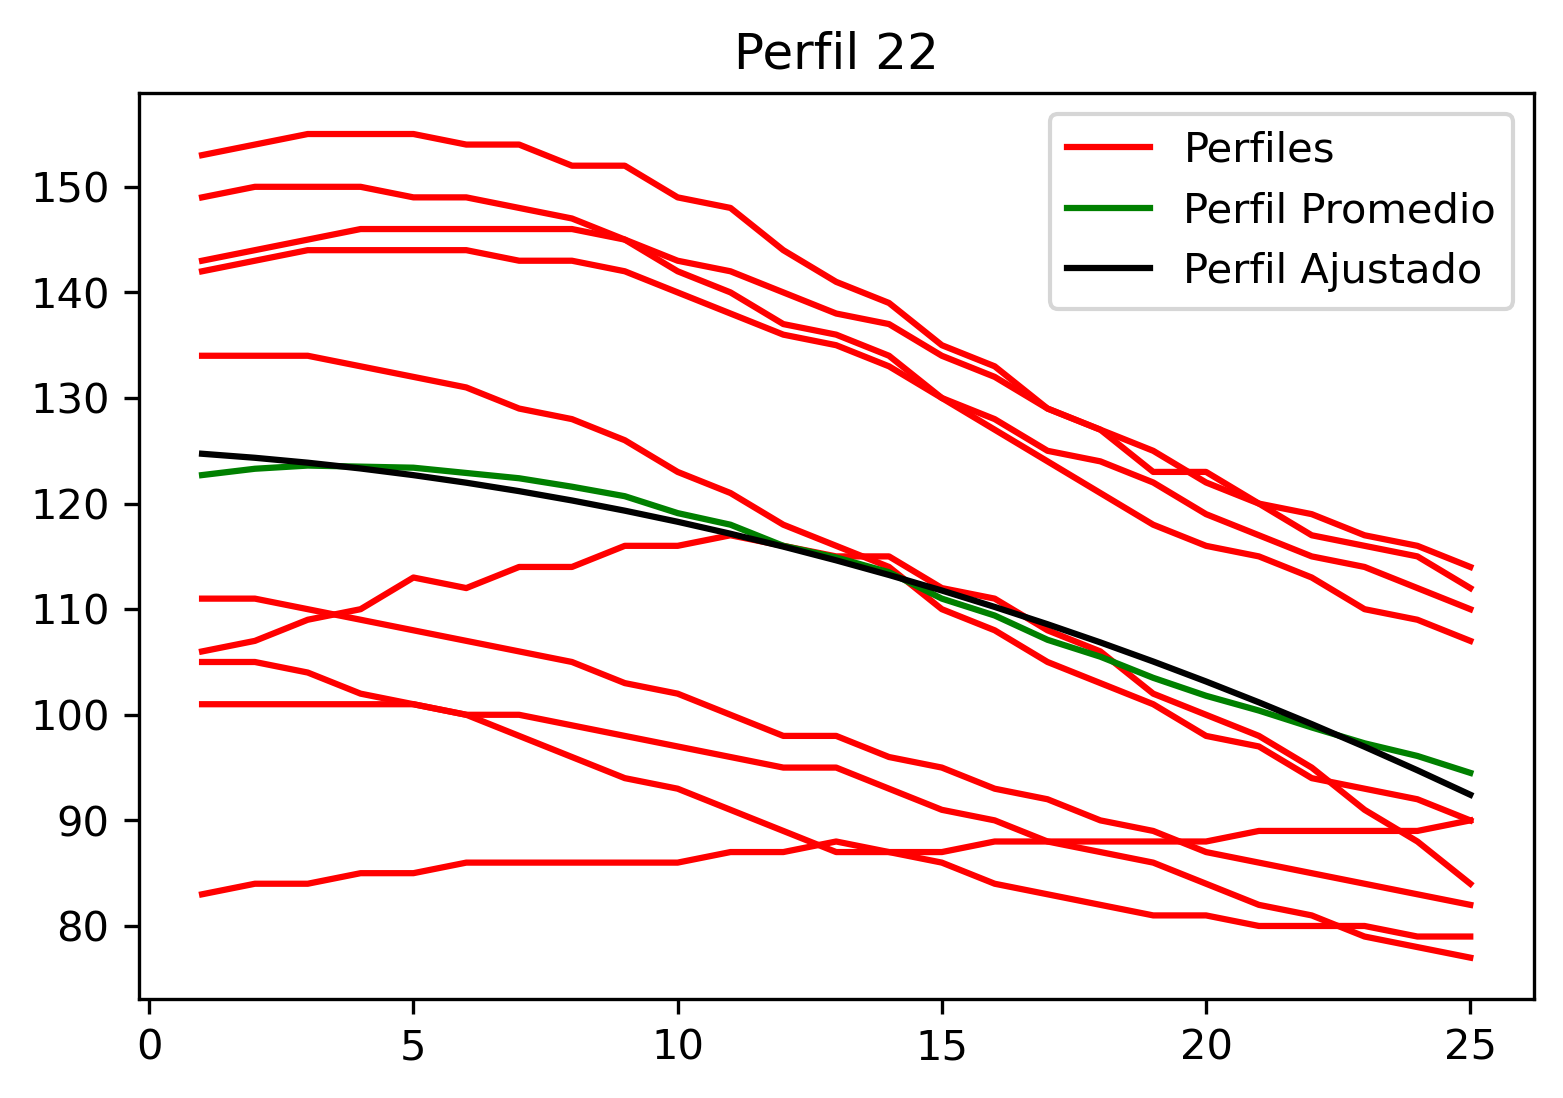

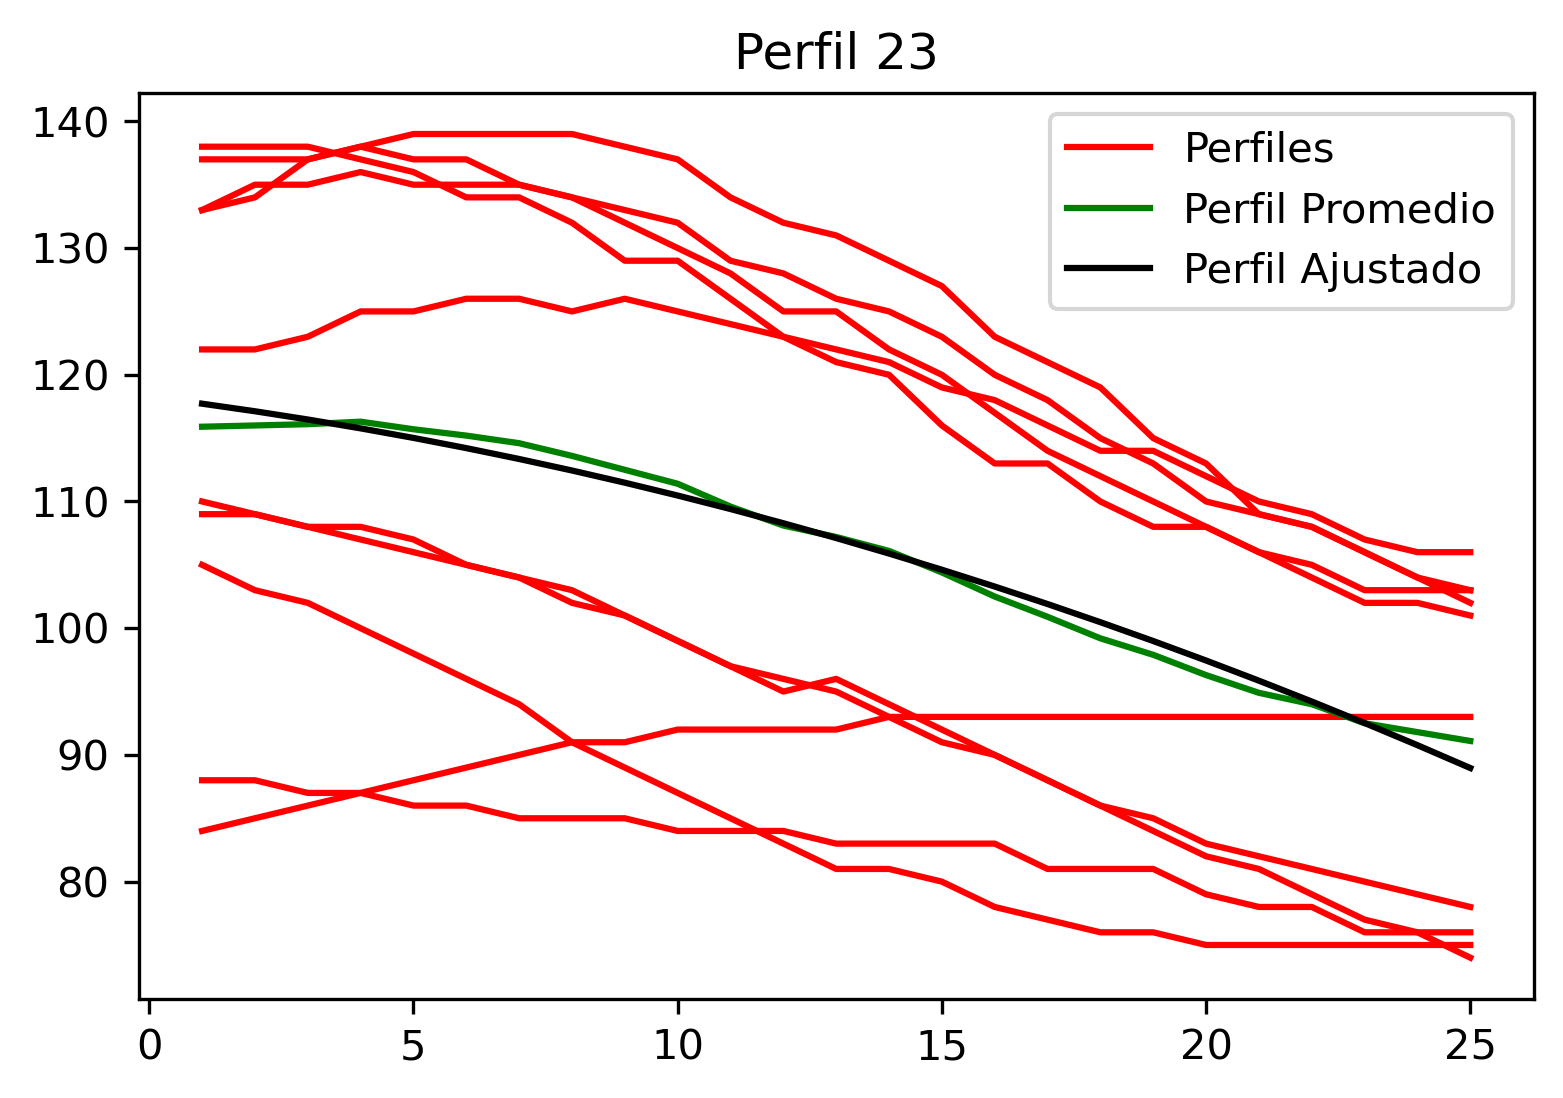

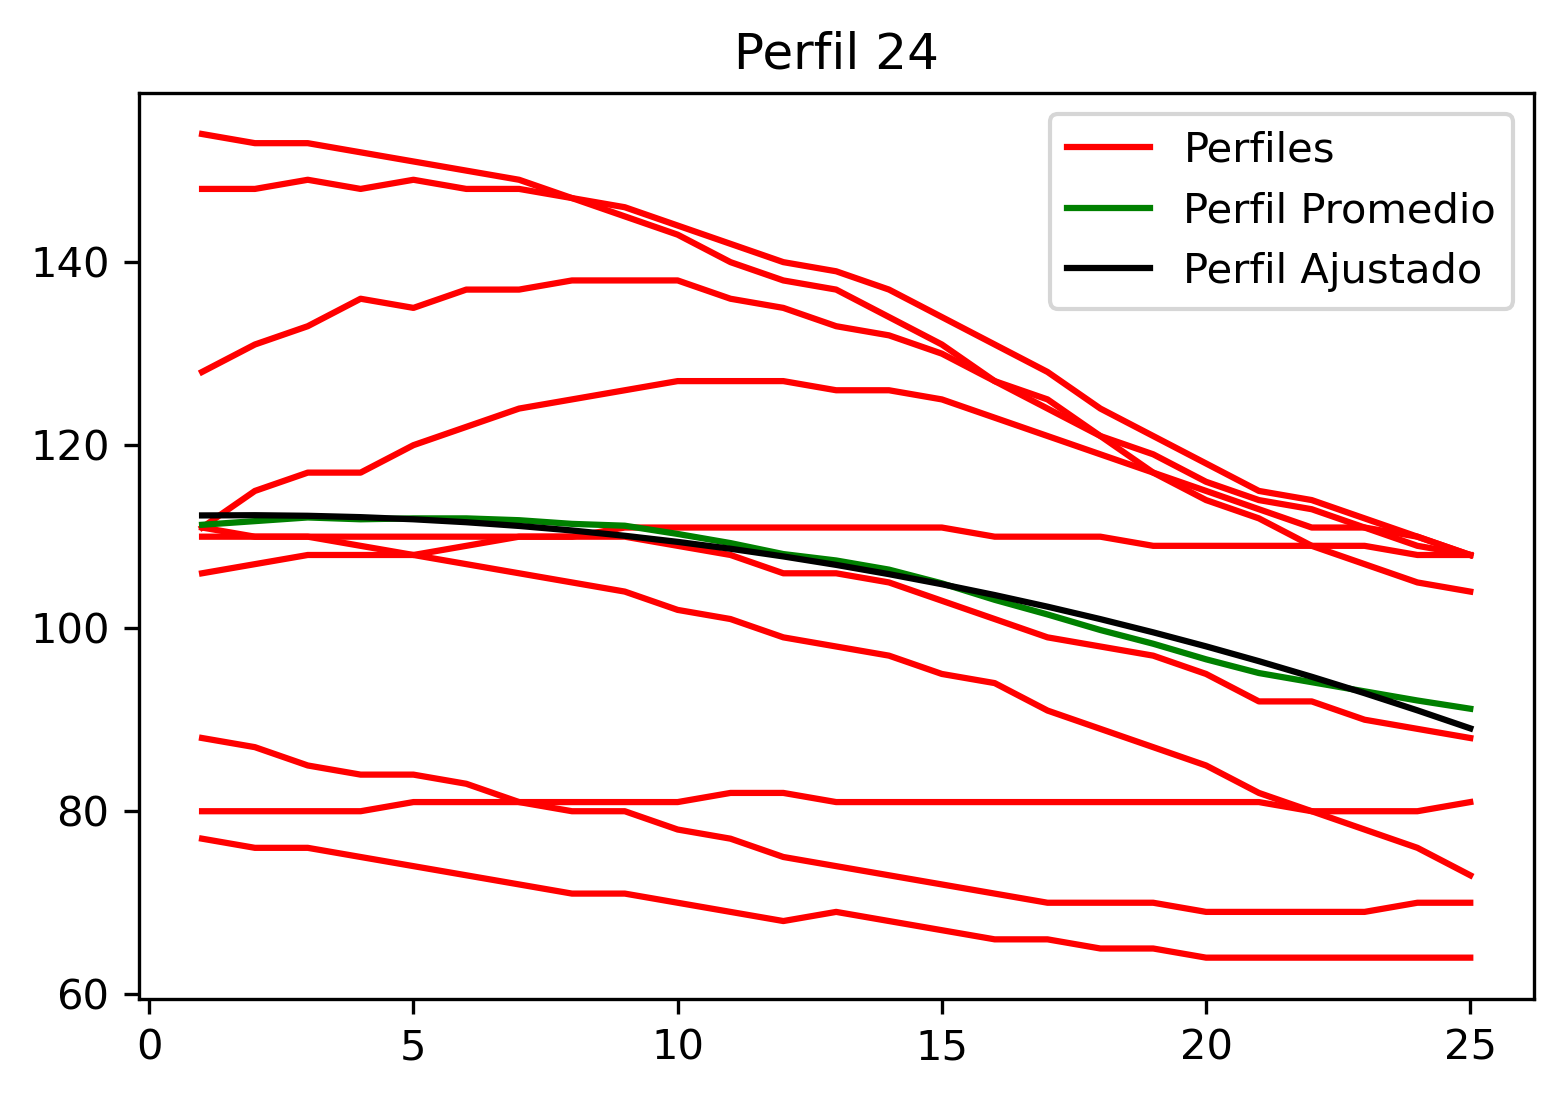

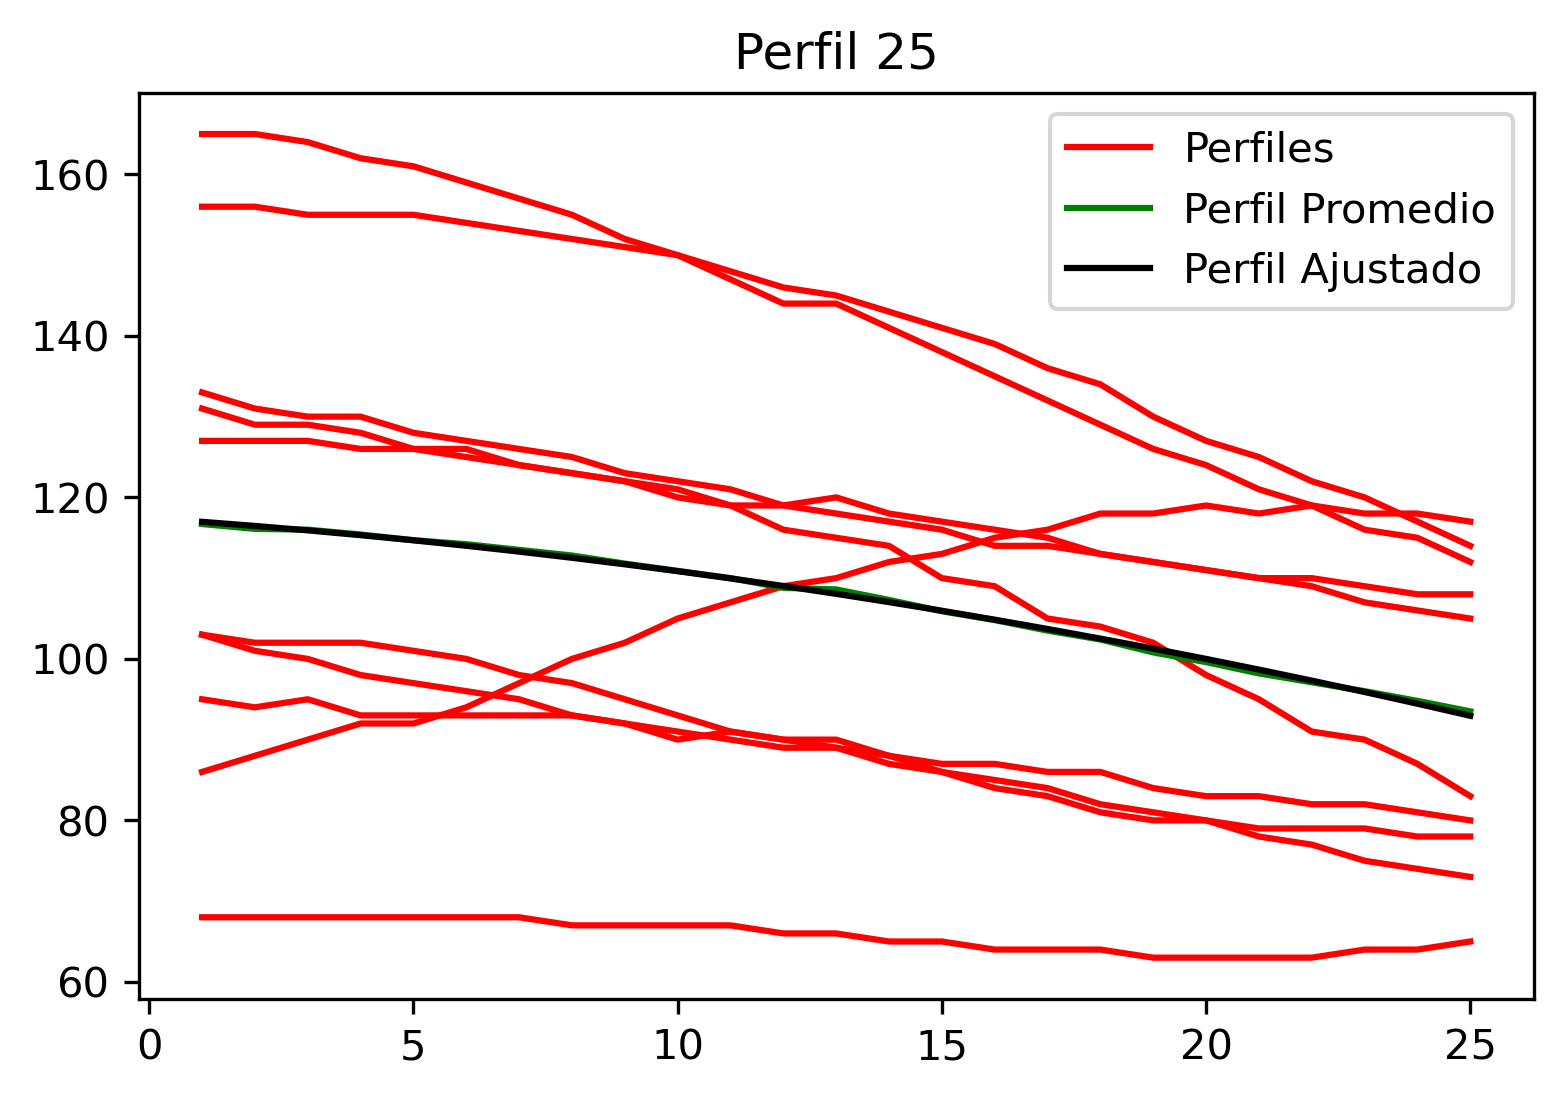

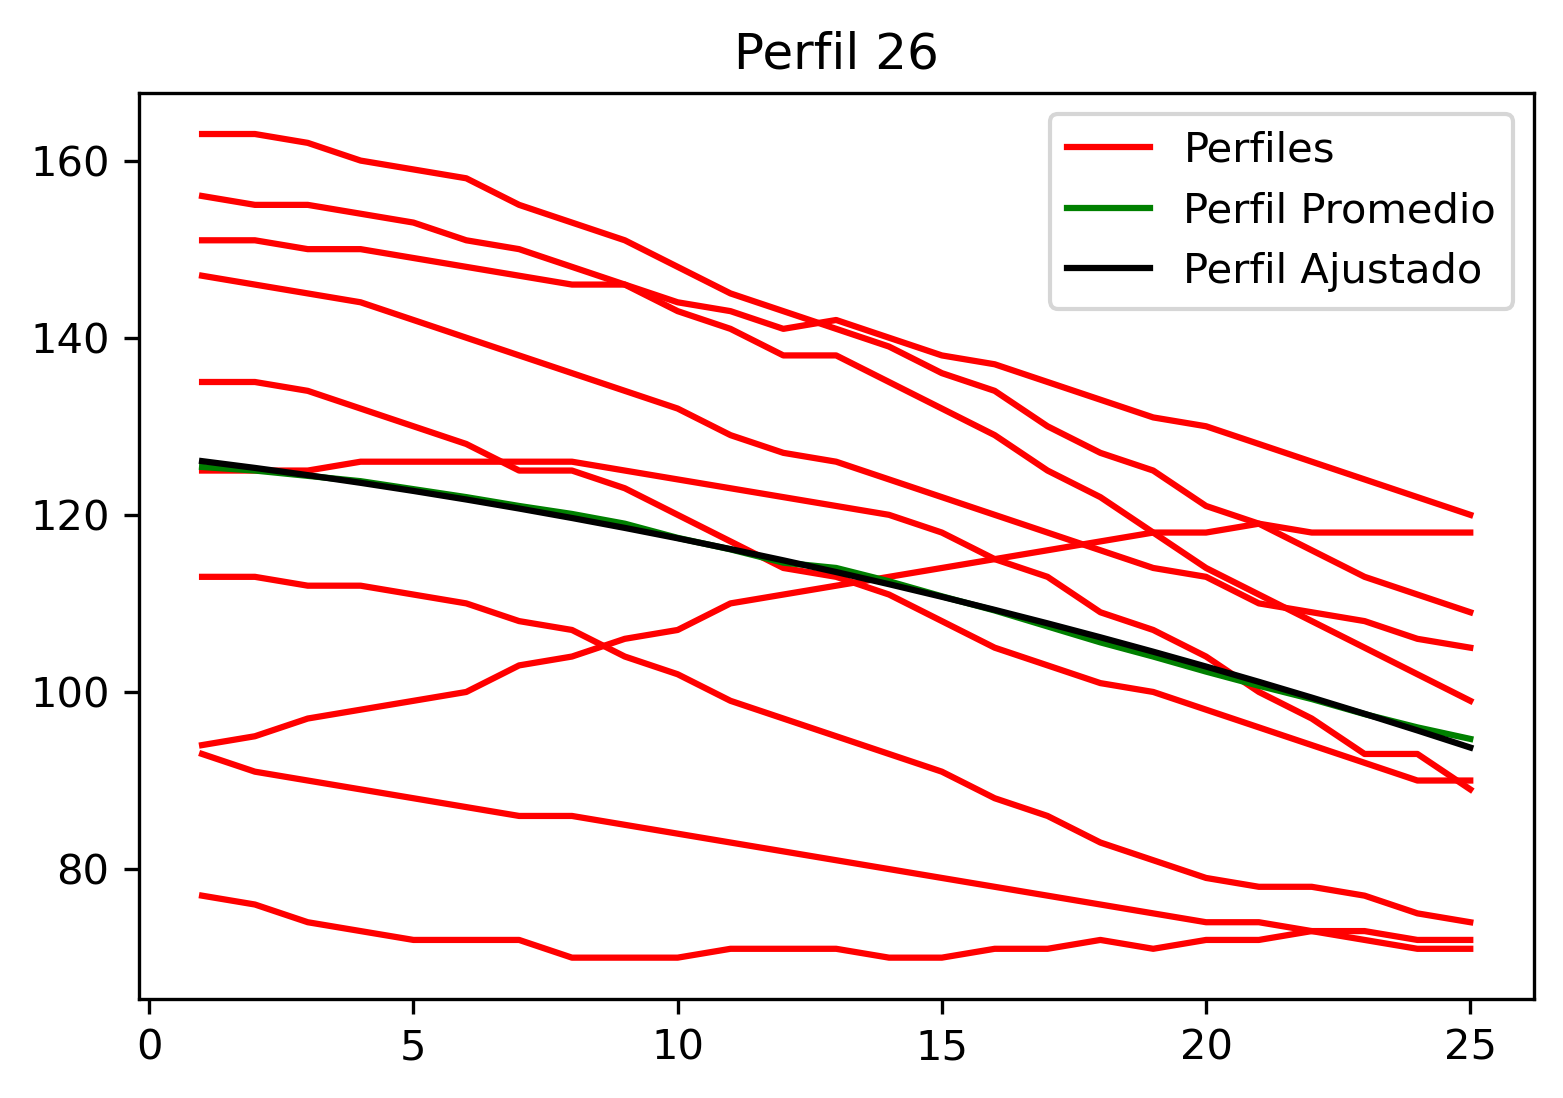

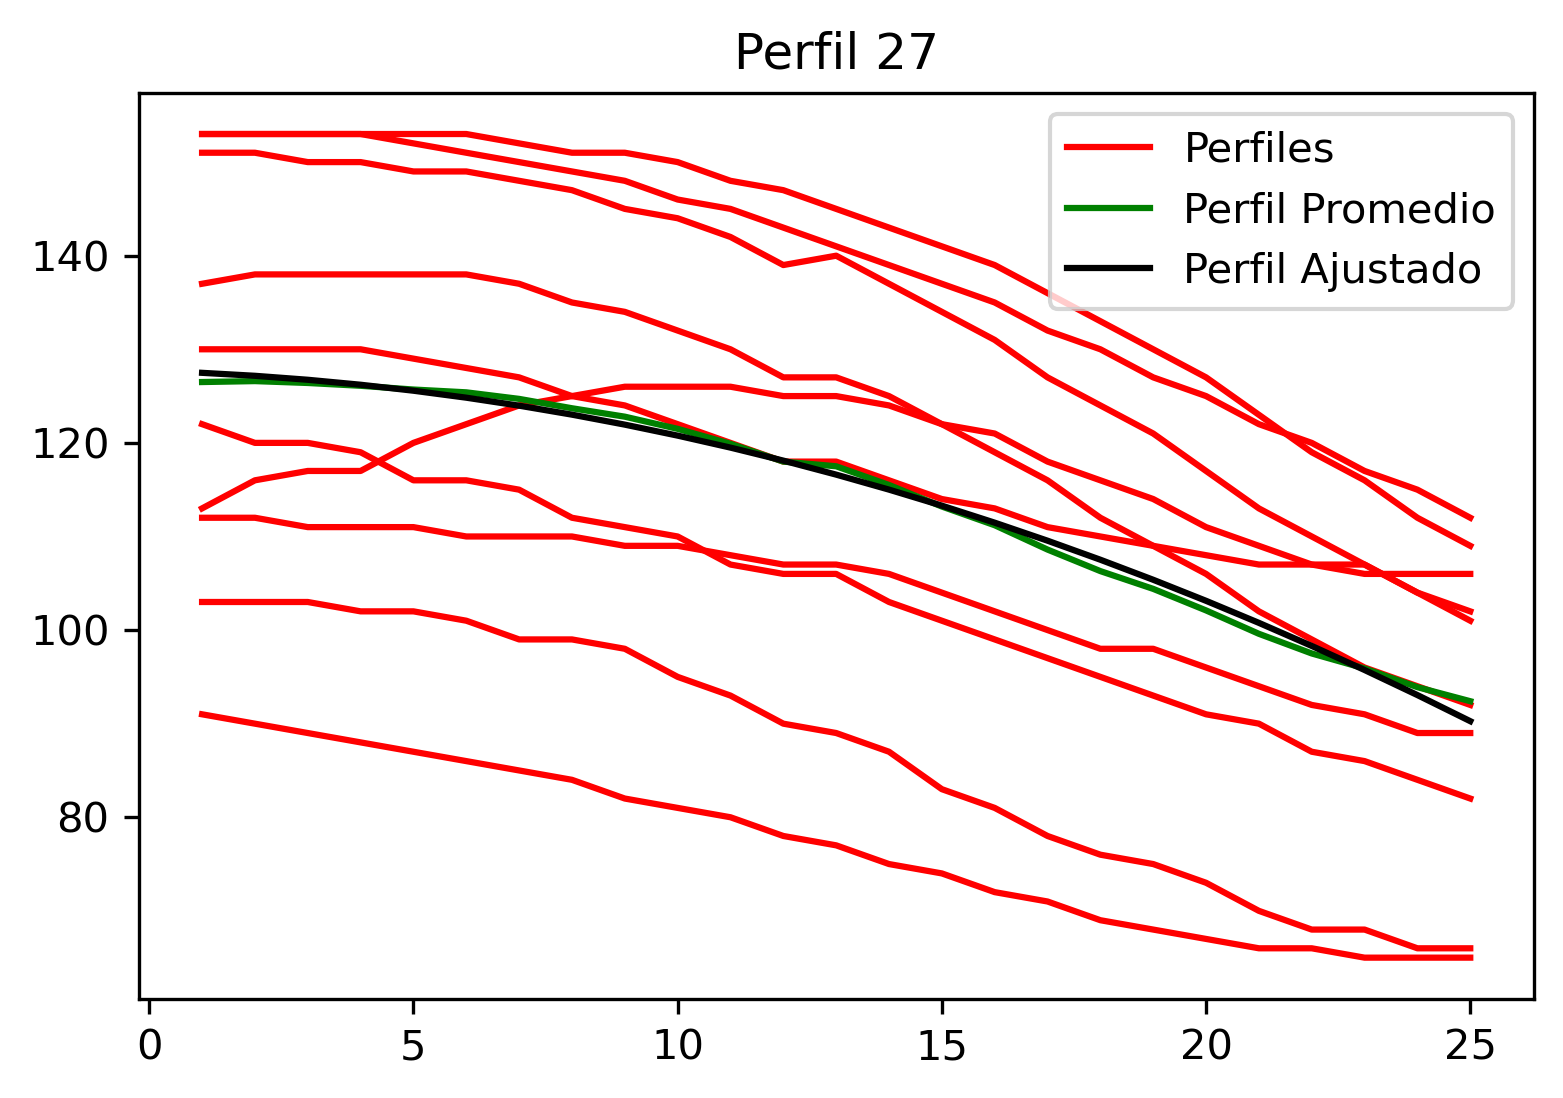

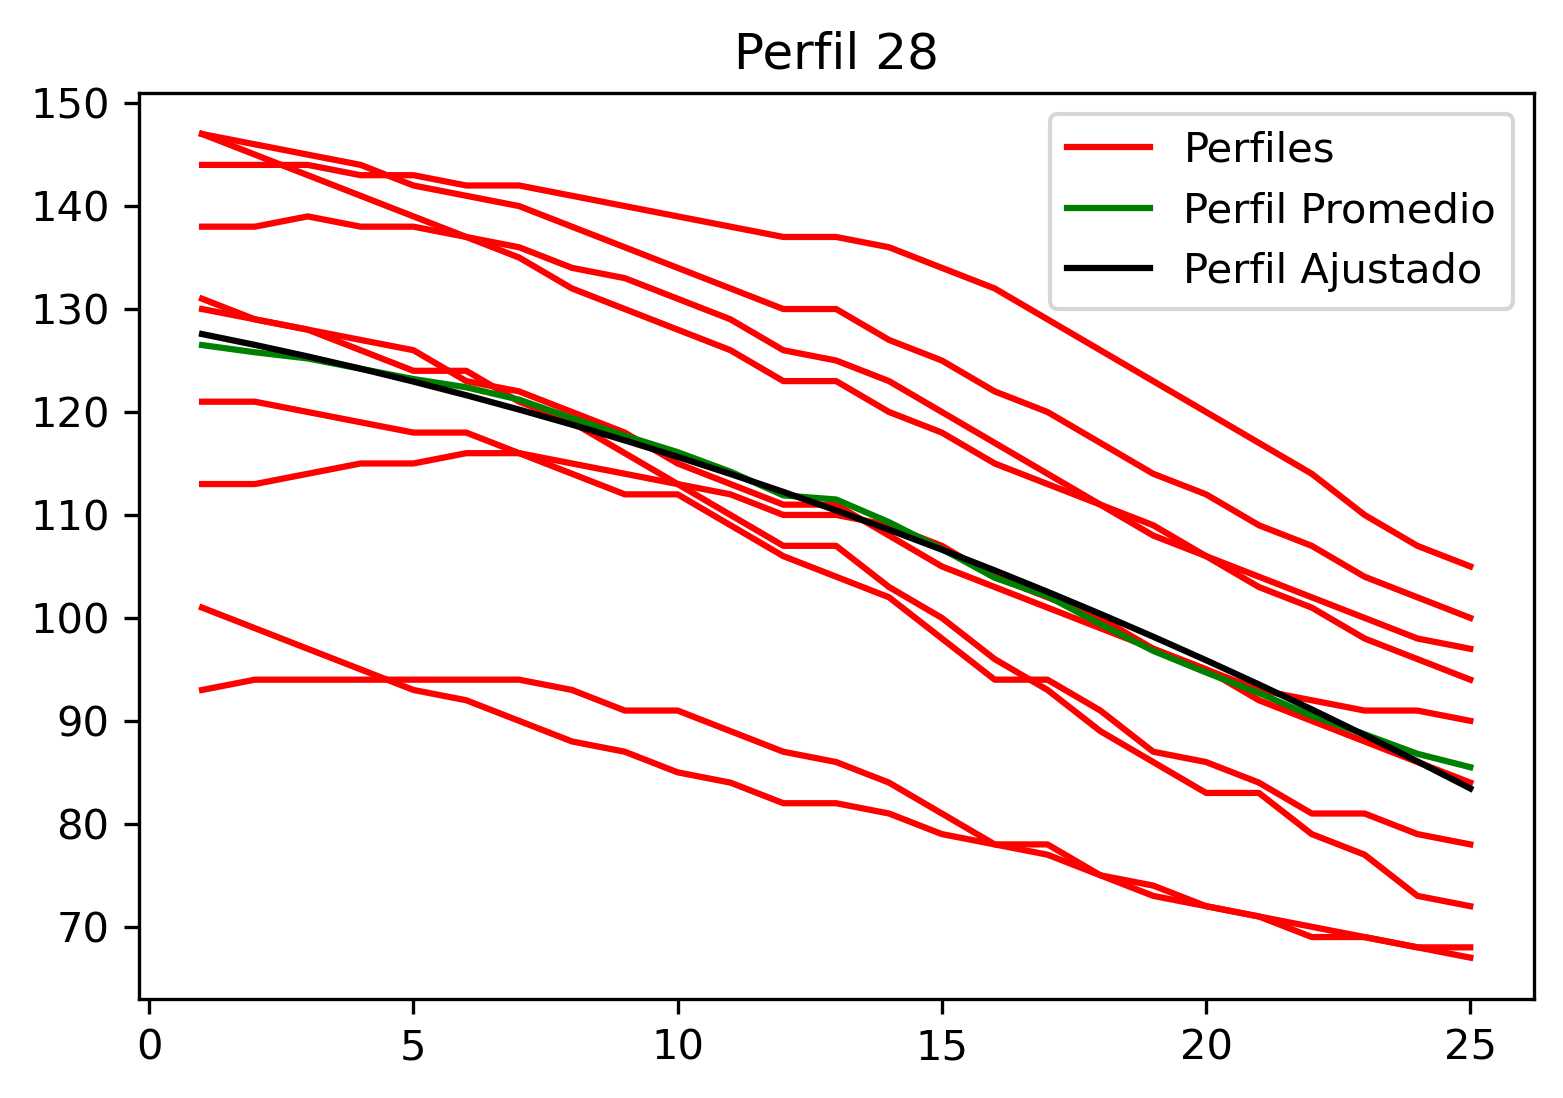

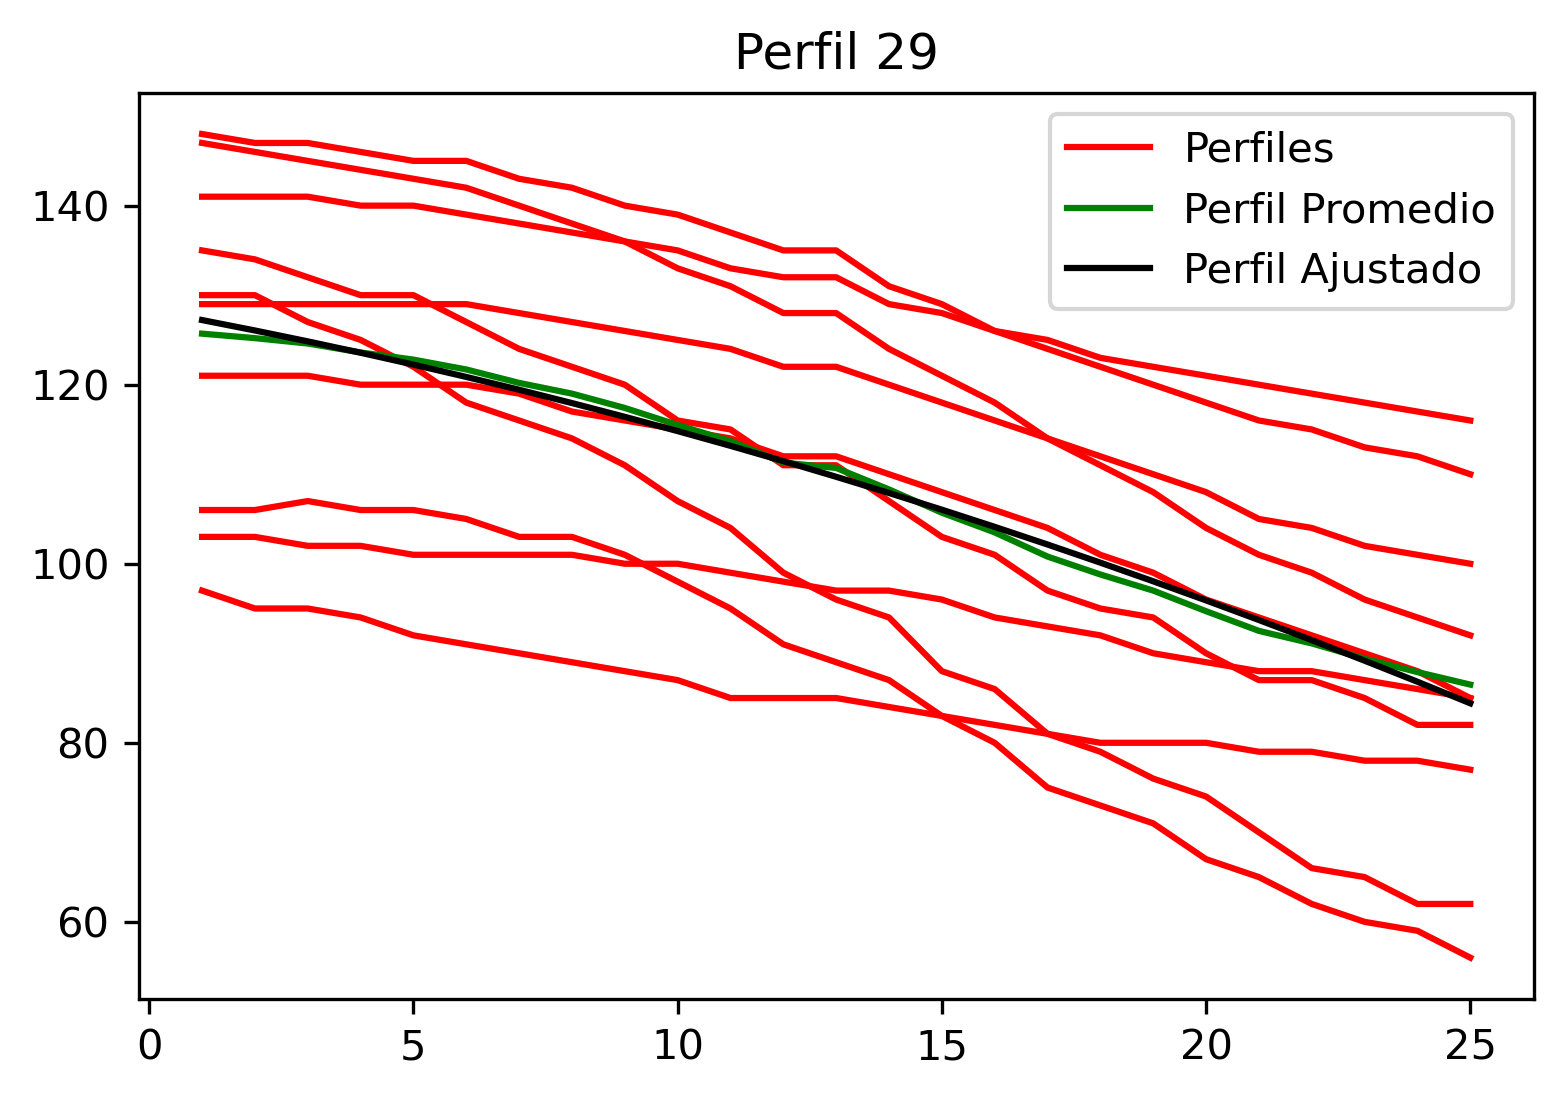

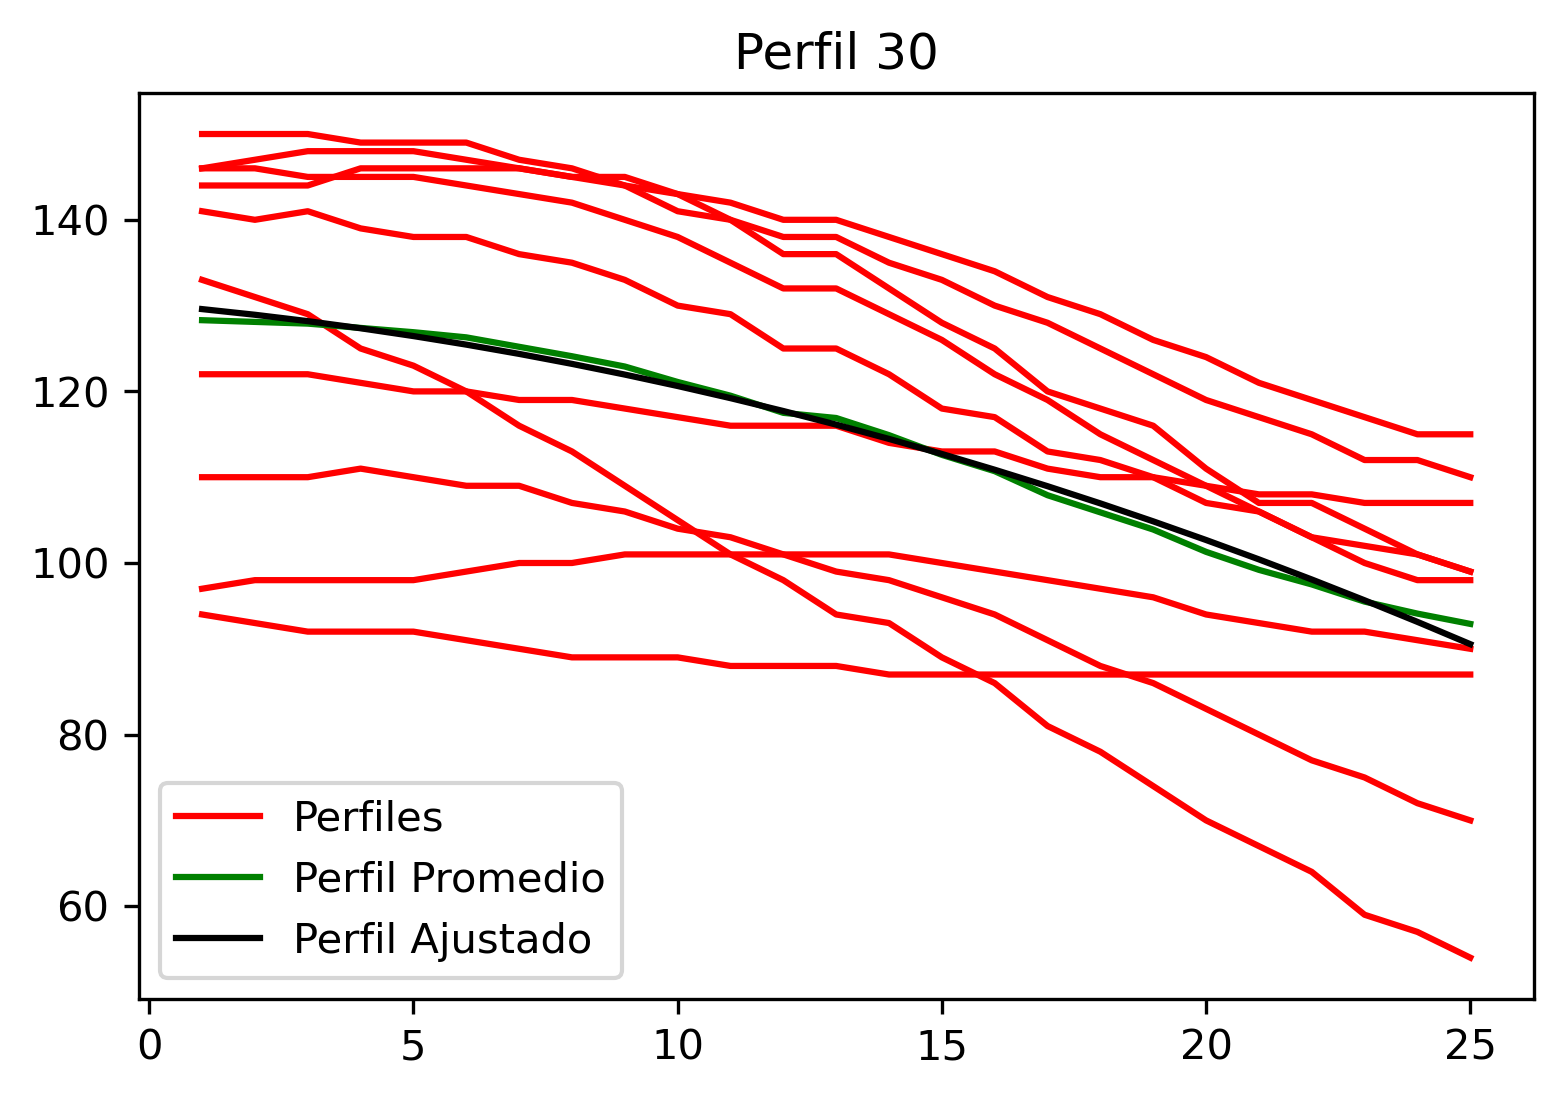

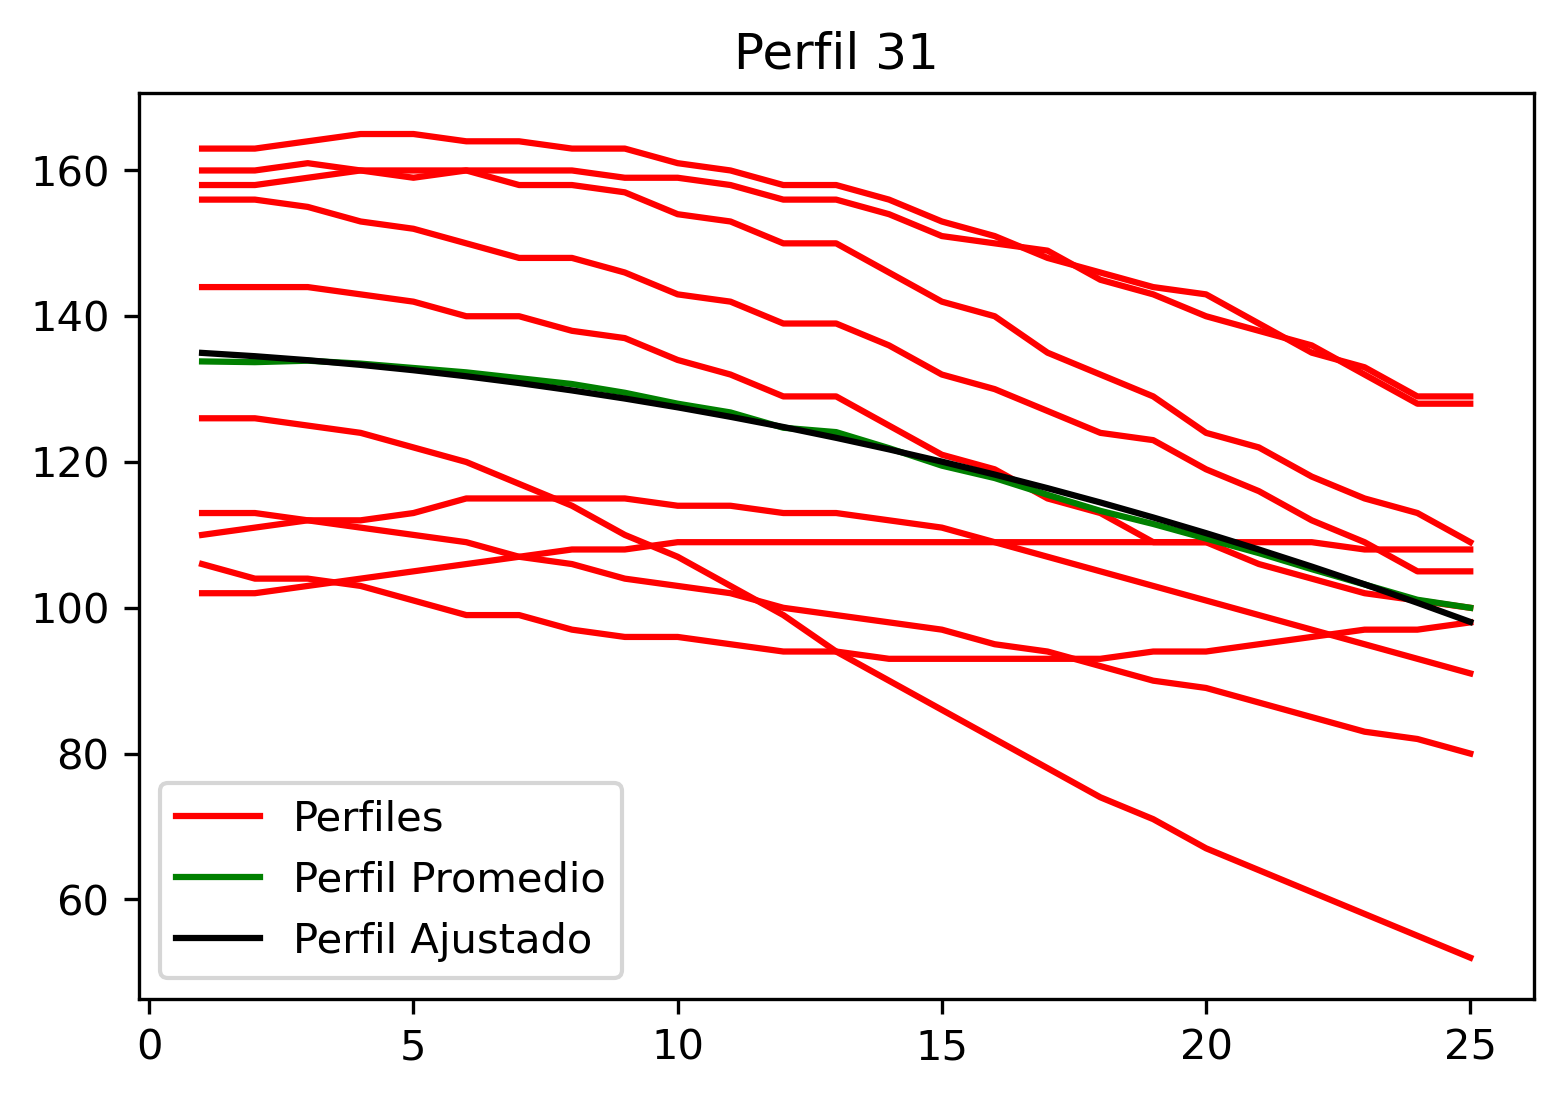

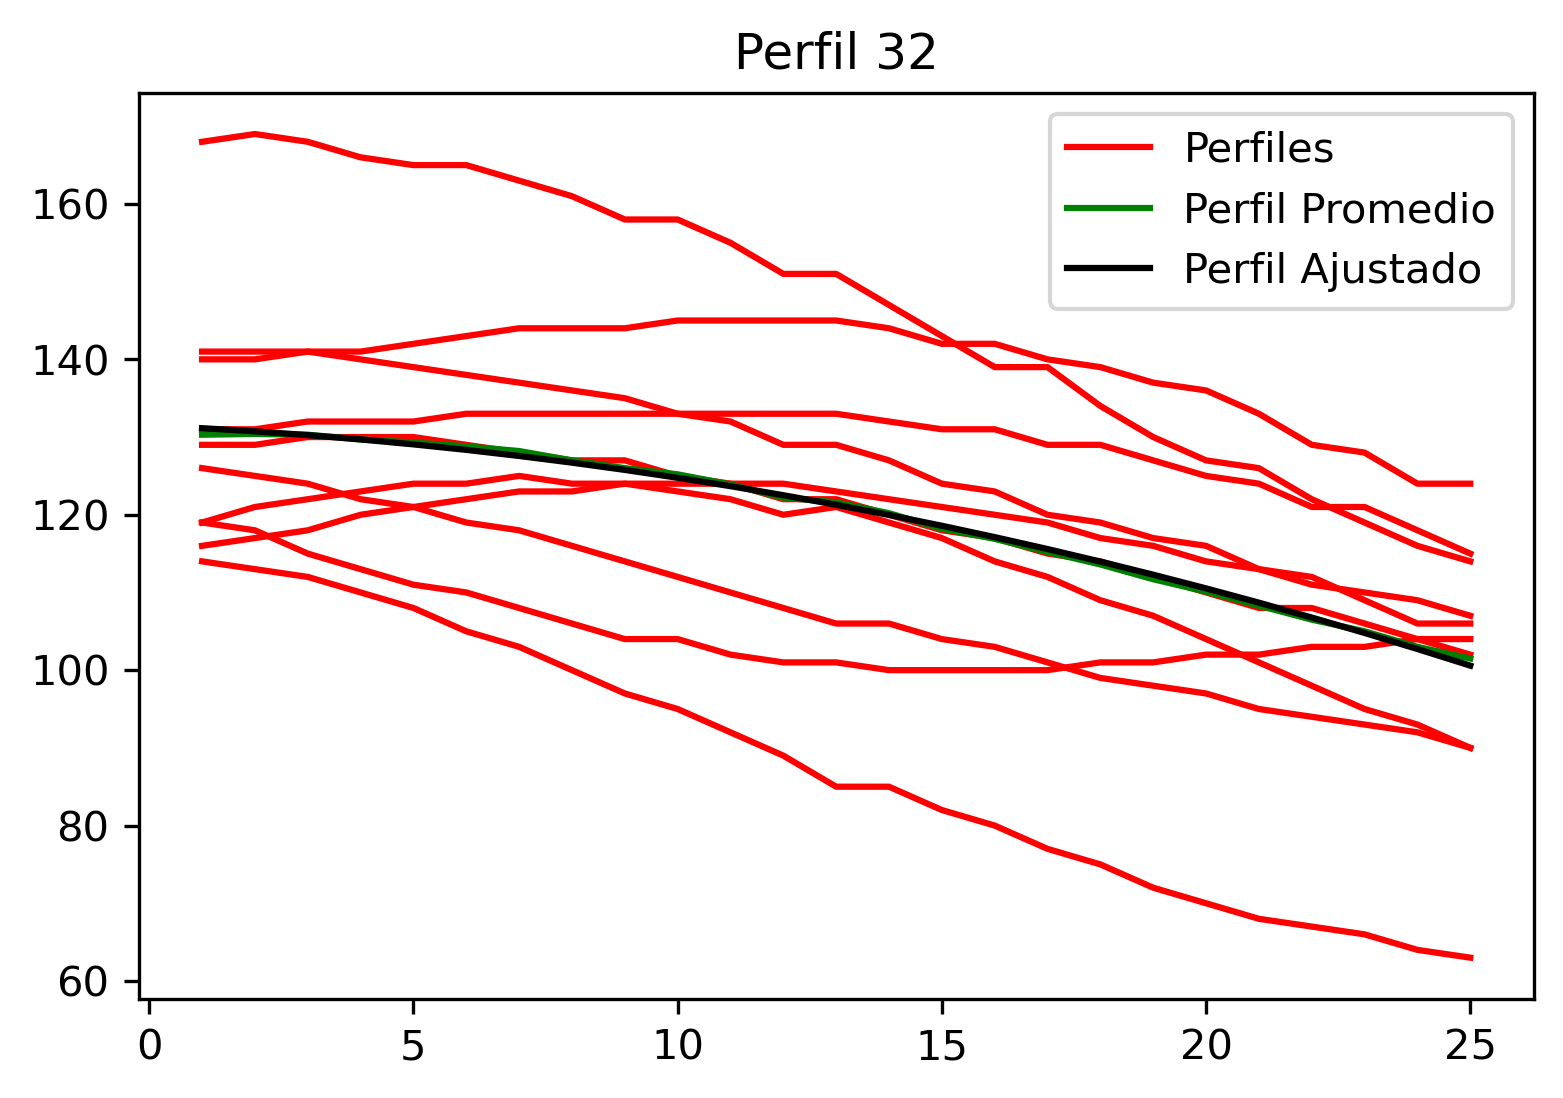

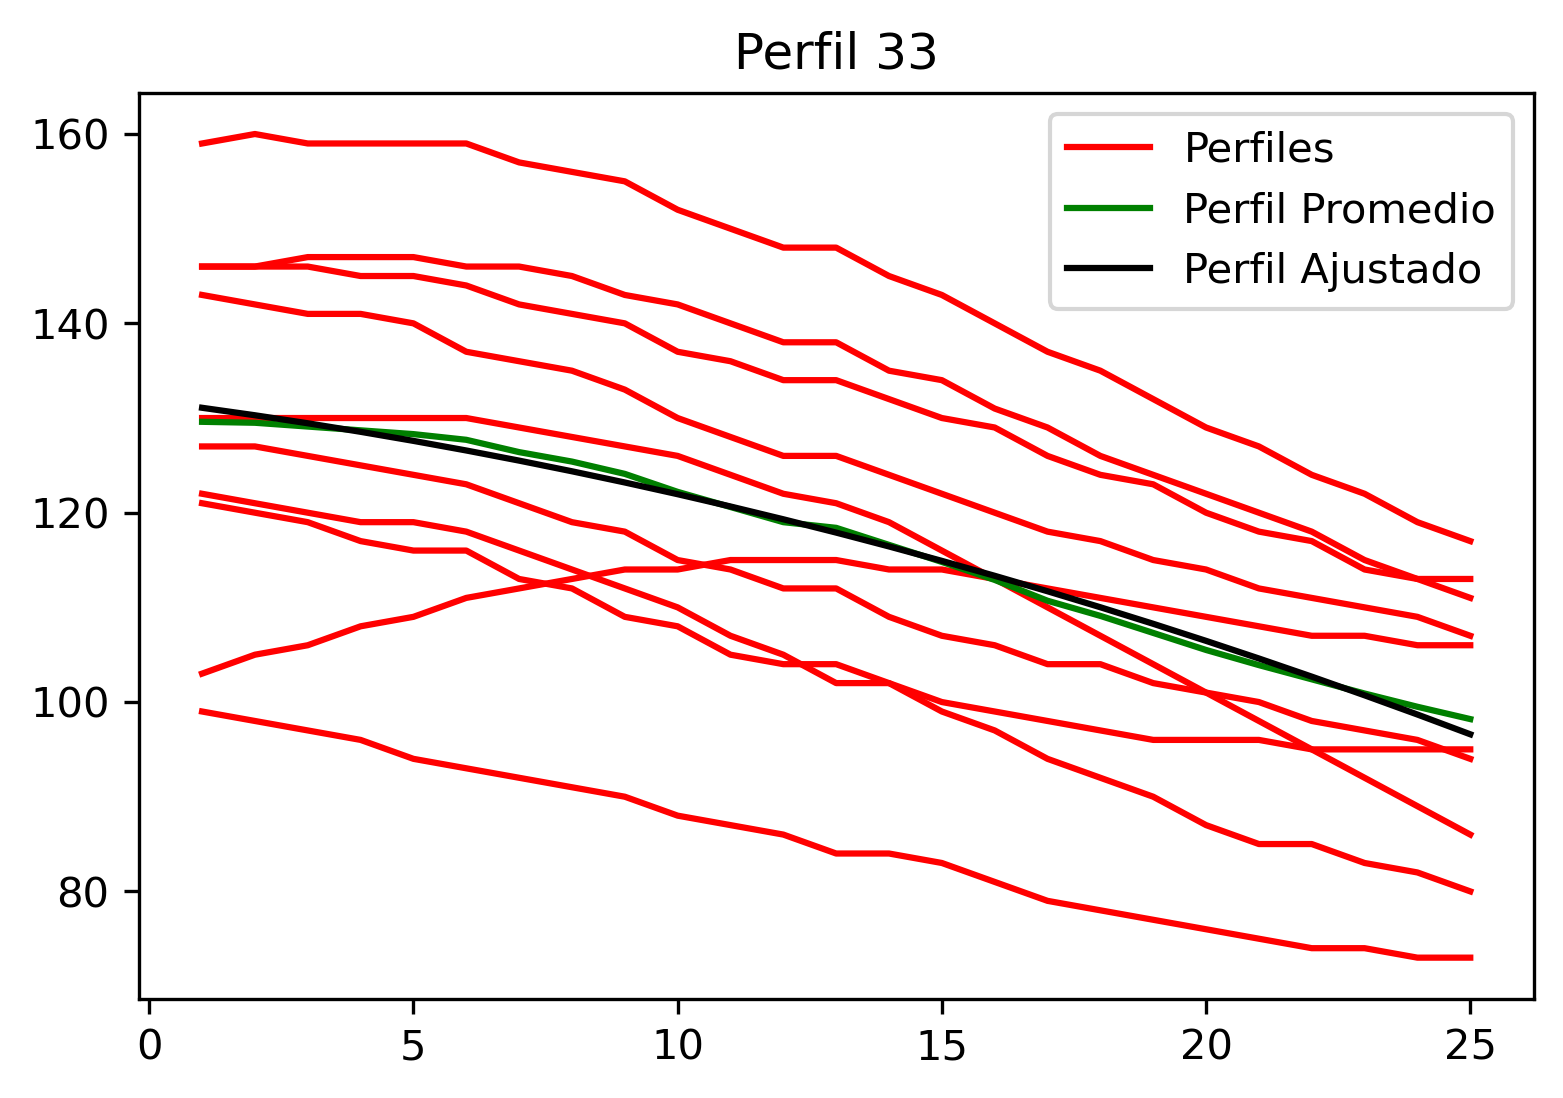

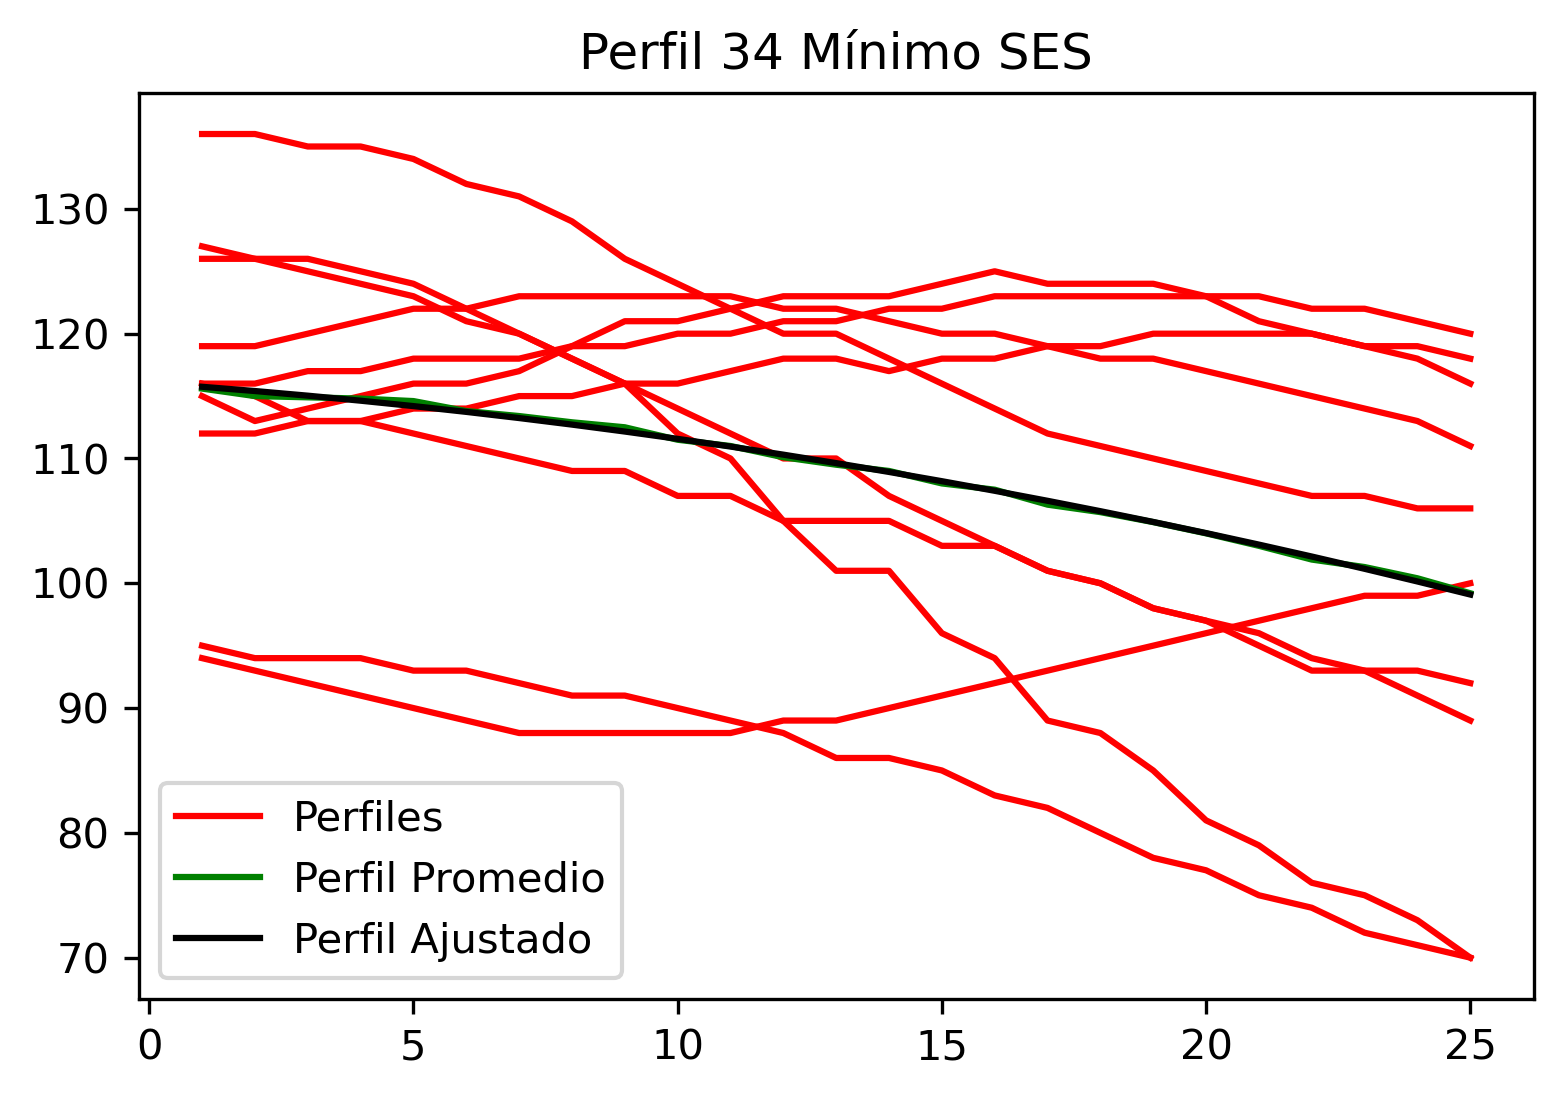

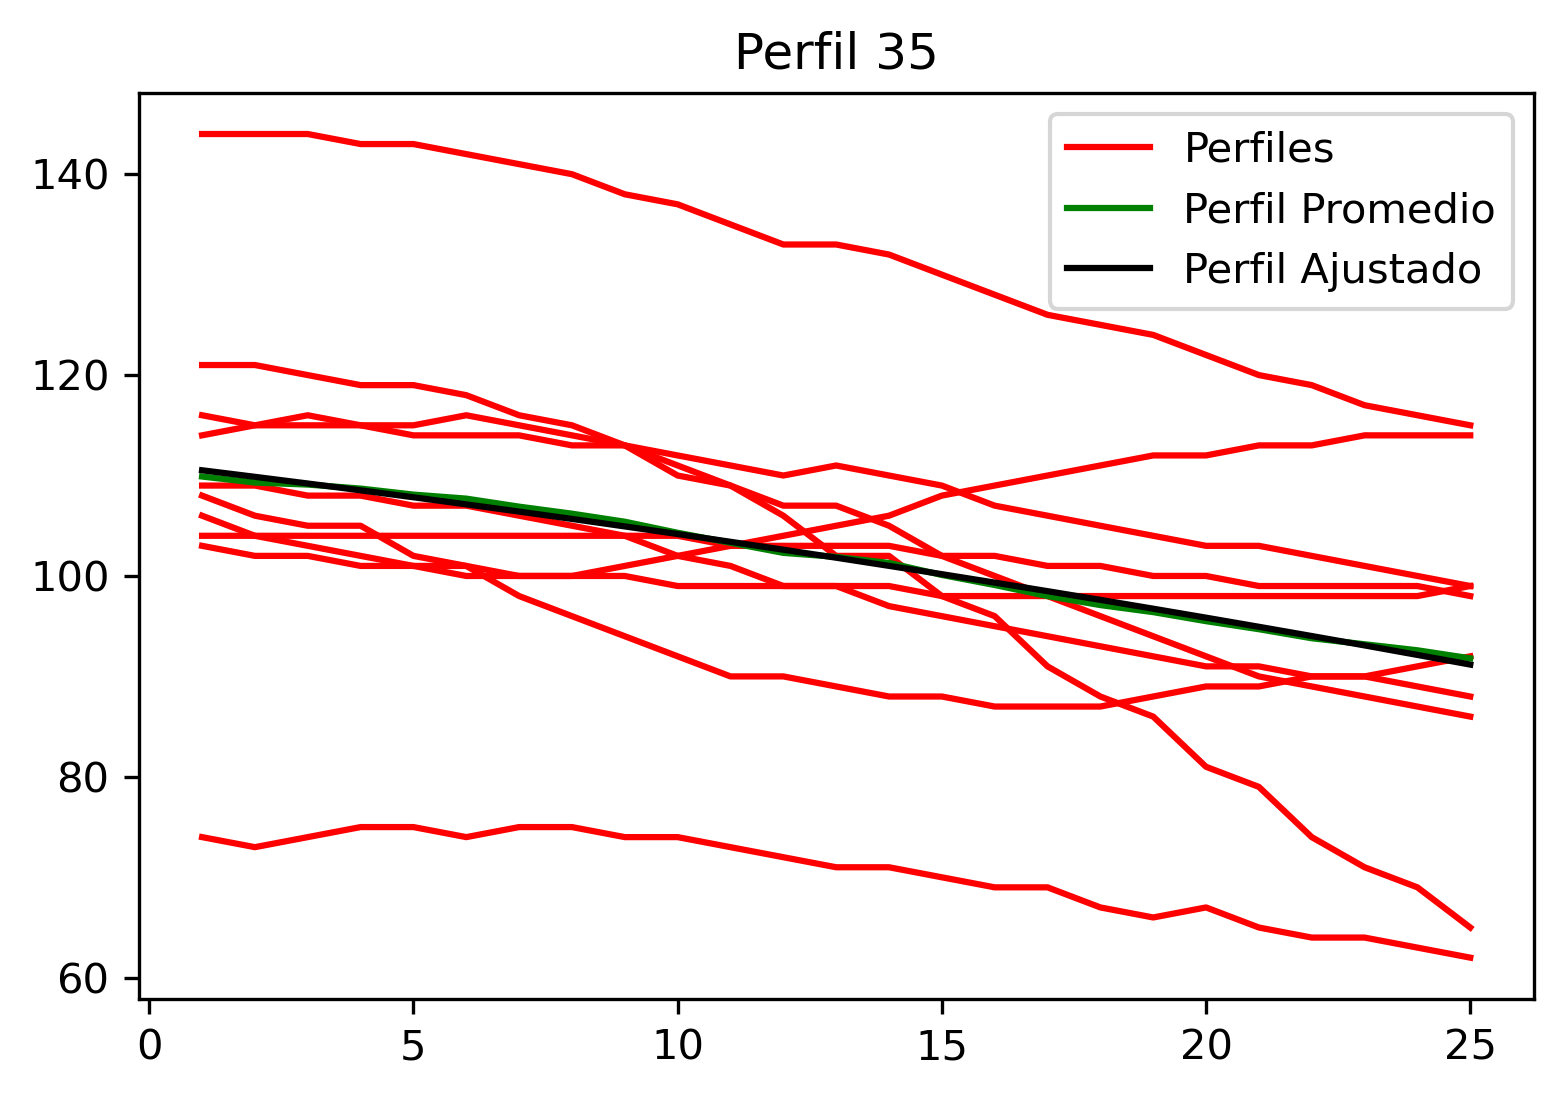

In [10]:
import matplotlib.lines as mlines
plt.figure(figsize=(15,10))
red_line = mlines.Line2D([], [], color='r', label='Perfiles')
green_line = mlines.Line2D([], [], color='g', label='Perfil Promedio')
black_line = mlines.Line2D([], [], color='k', label='Perfil Ajustado')

for t in range(len(ListaLineas[0])):
    plt.figure(dpi=300)
    for i in ListaLineas:
        plt.plot(X,i[t],color='r')
    plt.plot(X,PerfilPromedio[t],color='g')
    plt.plot(X,AFRP[t],color='k')
    if t == minSES:
        plt.title(f'Perfil {str(t+1)} Mínimo SES')
    elif t == maxSES:
        plt.title(f'Perfil {str(t+1)} Máximo SES')
    else:
        plt.title(f'Perfil {str(t+1)}')
    plt.legend(handles=[red_line,green_line,black_line])
    plt.show()